# Reading Multi Spectral Images

https://nbviewer.jupyter.org/github/thomasaarholt/hyperspy-demos/blob/master/2_SVD_and_BSS.ipynb


## Multispectral Imagery
Images obtained with a ADC Lite - Tetracam's Lightweight ADC

I made pitures about: 

>Aluminum , Copper, Brass, Iron, Stainless Steel, Painted Iron 

http://tetracam.com/Products-ADC_Lite.htm

MRobalinho - 19-04-2019

## Add Libraries

In [1]:
# Add libraries
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageFilter, ImageOps
from openpyxl import load_workbook

In [2]:
# Verify my current folder
currDir = os.path.dirname(os.path.realpath("__file__"))
mypath = currDir
print(currDir)  

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook


In [3]:
# Path to the image files
folder = "imagedata01"
# Part name of file to filter files
end_file = ".tif"
path = currDir + "/" + folder + "/"

## Read images from folder

In [4]:
# Read files from folder
print(path)
print('-')
print(' ---- IMAGES ON THE FOLDER :', folder, '------- *', end_file)

list_of_images = list()  # save all images on folder for further processing 

for file in os.listdir(path):
    if file.endswith(end_file):
        print(os.path.join(file))
        list_of_images.append(file)   # save all images on folder for further processing 
print('-')        

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/
-
 ---- IMAGES ON THE FOLDER : imagedata01 ------- * .tif
aluminum_001.tif
aluminum_002.tif
aluminum_003.tif
aluminum_004.tif
alum_001.tif
alum_002.tif
alum_003.tif
alum_004.tif
brass_001.tif
brass_002.tif
brass_003.tif
copper_001.tif
copper_002.tif
copper_003.tif
copper_004.tif
copper_005.tif
iron_001.tif
iron_002.tif
iron_003.tif
painted_iron_001.tif
painted_iron_002.tif
painted_iron_003.tif
plasticised_copper_wire_001.tif
plasticised_copper_wire_002.tif
plasticised_copper_wire_003.tif
plasticised_copper_wire_004.tif
stainless_steel_001.tif
stainless_steel_002.tif
stainless_steel_003.tif
-


In [5]:
# Create Data Frame with image information
df_image = []

## Functions to the work

In [6]:
# Read image with PIL
from PIL import Image, ImageFilter, ImageOps
def read_pil_image(file1):
    #print('Reading PIL image:', file1)
    try:
        im_pil = Image.open(file1)
    except:
        print("-->Unable to load image",file1)
    return im_pil

In [7]:
# Read image with OPENCV
import cv2
def read_cv2_image(file1):
    #print('Reading CV image:',file1)
    try:
        im_cv = cv2.imread(file1)
    except:
        print("-->Unable to load image",file1)
    return im_cv

In [8]:
# Look from an chanel from then image

def channel(img, n):
    """Isolate the nth channel from the image.

       n = 0: red, 1: green, 2: blue
    """
    a = np.array(img)
    a[:,:,(n!=0, n!=1, n!=2)] *= 0
#   a[:,:,n] *= 0
#   print(Image.fromarray(a), 'Get Channel n: ', n)

    print('Get Channel n: ', n)
    return Image.fromarray(a)

# def to resize 
# Given parameters : image , number to divide (resize)
def imageResize(img, n):
    width, height = img.size 

    print('Original size:', width, '/', height, 'Resize:',n)
    
    newWidth = int(width / n)
    newHeight = int(height / n)
    img.resize((newWidth, newHeight), Image.ANTIALIAS)
    print('New size:', newWidth, '/', newHeight)
    return img

In [9]:
# Obtain main color from image
# https://convertingcolors.com/rgb-color-169_171_170.html
    
def get_main_color(path, file):
    #img = Image.open(path+file)
    file1 = path+file
    # Read image
    img = read_pil_image(file1)
    if img == None:
        print("-->Unable to load image",file1)
        
    colors = img.getcolors( 1024*1024) #put a higher value if there are many colors in your image
    print('Get main Color file:', file)
    max_occurence, most_present = 0, 0
    try:
        for c in colors:
            if c[0] > max_occurence:
                (max_occurence, most_present) = c
        return most_present
    except TypeError:
        raise Exception("Too many colors in the image")

In [10]:
#!/usr/bin/python

# Return one 24-bit color value 
def rgbToDecimal(x_rgb):
    r,g,b = rgbToRGB(x_rgb)
    rgb_dec = (r << 16) + (g << 8) + b
    #print('RGB Color:', x_rgb, '   Dec:', rgb_dec)
    return rgb_dec

# Convert 24-bit color value to RGB
def colorToRGB(c):
    r = c >> 16
    c -= r * 65536;
    g = c / 256
    c -= g * 256;
    b = c
    return [r, g, b]

def rgbToRGB(x_rgb):
    x_rgb = list(x_rgb)
    r = x_rgb[0]
    g = x_rgb[1]
    b = x_rgb[2]

    #print('rgbToRGB:',x_rgb, r,g,b)
    return r, g, b

def getRGBfromI(RGBint):
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def getIfromRGB(rgb):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    #print('getIfromRGB:', red, green, blue)
    RGBint = (red<<16) + (green<<8) + blue
    return RGBint

# RGB to Hex Decimal
def rgb_to_hex(rgb):
    rgb_int = bytes(rgb).hex()
    rgb_dec = '#'+str(rgb_int)
    #print('RGB :',rgb, '  Hex Dec:', rgb_dec)
    return rgb_dec

# Test
#x_rgb = (254, 250, 255)
#rgb_hex = rgb_to_hex(x_rgb)
#rgb_dec = rgbToDecimal(x_rgb)

In [11]:
# https://github.com/conda-forge/webcolors-feedstock
# conda config --add channels conda-forge
# conda install webcolors
# It is possible to list all of the versions of webcolors available on your platform with:
#       conda search webcolors --channel conda-forge

# COLOR NAME
import webcolors
def get_color_name(rgb_x):
    min_colours = {}
    for key, name in webcolors.css21_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_x[0]) ** 2
        gd = (g_c - rgb_x[1]) ** 2
        bd = (b_c - rgb_x[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    print('Color name from RGB:',rgb_x,'  is :',min_colours[min(min_colours.keys())])
    return min_colours[min(min_colours.keys())]

In [12]:
# Get color name from RGB
# https://stackoverflow.com/questions/2453344/find-the-colour-name-from-a-hexadecimal-colour-code

colorof = {'#F0F8FF':"aliceblue",
'#FAEBD7':"antiquewhite",
'#00FFFF':"aqua",
'#7FFFD4':"aquamarine",
'#F0FFFF':"azure",
'#F5F5DC':"beige",
'#FFE4C4':"bisque",
'#000000':"black",
'#FFEBCD':"blanchedalmond",
'#0000FF':"blue",
'#8A2BE2':"blueviolet",
'#A52A2A':"brown",
'#DEB887':"burlywood",
'#5F9EA0':"cadetblue",
'#7FFF00':"chartreuse",
'#D2691E':"chocolate",
'#FF7F50':"coral",
'#6495ED':"cornflowerblue",
'#FFF8DC':"cornsilk",
'#DC143C':"crimson",
'#00FFFF':"cyan",
'#00008B':"darkblue",
'#008B8B':"darkcyan",
'#B8860B':"darkgoldenrod",
'#A9A9A9':"darkgray",
'#006400':"darkgreen",
'#BDB76B':"darkkhaki",
'#8B008B':"darkmagenta",
'#556B2F':"darkolivegreen",
'#FF8C00':"darkorange",
'#9932CC':"darkorchid",
'#8B0000':"darkred",
'#E9967A':"darksalmon",
'#8FBC8B':"darkseagreen",
'#483D8B':"darkslateblue",
'#2F4F4F':"darkslategray",
'#00CED1':"darkturquoise",
'#9400D3':"darkviolet",
'#FF1493':"deeppink",
'#00BFFF':"deepskyblue",
'#696969':"dimgray",
'#1E90FF':"dodgerblue",
'#B22222':"firebrick",
'#FFFAF0':"floralwhite",
'#228B22':"forestgreen",
'#FF00FF':"fuchsia",
'#DCDCDC':"gainsboro",
'#F8F8FF':"ghostwhite",
'#FFD700':"gold",
'#DAA520':"goldenrod",
'#808080':"gray",
'#008000':"green",
'#ADFF2F':"greenyellow",
'#F0FFF0':"honeydew",
'#FF69B4':"hotpink",
'#CD5C5C':"indianred",
'#4B0082':"indigo",
'#FFFFF0':"ivory",
'#F0E68C':"khaki",
'#E6E6FA':"lavender",
'#FFF0F5':"lavenderblush",
'#7CFC00':"lawngreen",
'#FFFACD':"lemonchiffon",
'#ADD8E6':"lightblue",
'#F08080':"lightcoral",
'#E0FFFF':"lightcyan",
'#FAFAD2':"lightgoldenrodyellow",
'#D3D3D3':"lightgray",
'#90EE90':"lightgreen",
'#FFB6C1':"lightpink",
'#FFA07A':"lightsalmon",
'#20B2AA':"lightseagreen",
'#87CEFA':"lightskyblue",
'#778899':"lightslategray",
'#B0C4DE':"lightsteelblue",
'#FFFFE0':"lightyellow",
'#00FF00':"lime",
'#32CD32':"limegreen",
'#FAF0E6':"linen",
'#FF00FF':"magenta",
'#800000':"maroon",
'#66CDAA':"mediumaquamarine",
'#0000CD':"mediumblue",
'#BA55D3':"mediumorchid",
'#9370DB':"mediumpurple",
'#3CB371':"mediumseagreen",
'#7B68EE':"mediumslateblue",
'#00FA9A':"mediumspringgreen",
'#48D1CC':"mediumturquoise",
'#C71585':"mediumvioletred",
'#191970':"midnightblue",
'#F5FFFA':"mintcream",
'#FFE4E1':"mistyrose",
'#FFE4B5':"moccasin",
'#FFDEAD':"navajowhite",
'#000080':"navy",
'#FDF5E6':"oldlace",
'#808000':"olive",
'#6B8E23':"olivedrab",
'#FFA500':"orange",
'#FF4500':"orangered",
'#DA70D6':"orchid",
'#EEE8AA':"palegoldenrod",
'#98FB98':"palegreen",
'#AFEEEE':"paleturquoise",
'#DB7093':"palevioletred",
'#FFEFD5':"papayawhip",
'#FFDAB9':"peachpuff",
'#CD853F':"peru",
'#FFC0CB':"pink",
'#DDA0DD':"plum",
'#B0E0E6':"powderblue",
'#800080':"purple",
'#FF0000':"red",
'#BC8F8F':"rosybrown",
'#4169E1':"royalblue",
'#8B4513':"saddlebrown",
'#FA8072':"salmon",
'#F4A460':"sandybrown",
'#2E8B57':"seagreen",
'#FFF5EE':"seashell",
'#A0522D':"sienna",
'#C0C0C0':"silver",
'#87CEEB':"skyblue",
'#6A5ACD':"slateblue",
'#708090':"slategray",
'#FFFAFA':"snow",
'#00FF7F':"springgreen",
'#4682B4':"steelblue",
'#D2B48C':"tan",
'#008080':"teal",
'#D8BFD8':"thistle",
'#FF6347':"tomato",
'#40E0D0':"turquoise",
'#EE82EE':"violet",
'#F5DEB3':"wheat",
'#FFFFFF':"white",
'#F5F5F5':"whitesmoke",
'#FFFF00':"yellow",
'#9ACD32':"yellowgreen"}


def get_rgb_color_name(rgb):
    
    hex_from_rgb = rgb_to_hex(rgb)  # transform RGB into hexadecimal
    hx = hex_from_rgb[1:8]
    #print(hx)
    # if color is found in dict
    if colorof.get(hx):return colorof[hx]

    # else return its closest available color
    m = 16777215
    k = '000000'
    for key in colorof.keys():
        key_color = key[1:8]
        #print(key_color)
        a = int(hx[:2],16)-int(key_color[:2],16)
        b = int(hx[2:4],16)-int(key_color[2:4],16)
        c = int(hx[4:],16)-int(key_color[4:],16)

        v = a*a+b*b+c*c # simple measure for distance between colors

        # v = (r1 - r2)^2 + (g1 - g2)^2 + (b1 - b2)^2

        if v <= m:
            m = v
            k = key

    return colorof[k], hex_from_rgb

# Test
#rgb_1 = (216, 220, 223)
#cname, hexdc = get_rgb_color_name(rgb_1)
#print('Found:',    cname, '  Hex:', hexdc)     # found in dict

Found: gainsboro   Hex: #d8dcdf


In [13]:
# Increase the contrast image
# im - image
# xvalue = contrast value
# https://pillow.readthedocs.io/en/4.0.x/reference/ImageEnhance.html
from PIL import ImageEnhance
# Path + file name + numeric value to enhancement

def contrast(path, xfile, xvalue):
    print('   Enhance image:', xfile, '  Value:', xvalue)
    file1 = path + xfile
    # Read Image
    im = read_pil_image(file1)
    if im == None:
        print("-->Unable to load image",file1)
    
    enh = ImageEnhance.Contrast(im)
    # enh.enhance(1.0).show("30% more contrast")
    x_enh = enh.enhance(xvalue)
     # Create name file masked
    f2_file = 'Enh_' + xfile
    print('   Save enhanced file :', f2_file)
    x_enh.save(f2_file)  # save enhanced file
    return x_enh, f2_file

In [14]:
# Return RGB separately
def return_rgb_from_RGB(rgb):
    p_rgb = list(rgb)
    red   = p_rgb[0]
    green = p_rgb[1]
    blue  = p_rgb[2]
    return red, green, blue

In [15]:
# Return distance from 2 colors

# http://hanzratech.in/2015/01/16/color-difference-between-2-colors-using-python.html
# https://python-colormath.readthedocs.io/en/latest/delta_e.html#delta-e-cie-2000

from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

def delta_2_colors(rgb_1, rgb_2):
    #print('   Delta colors: ', rgb_1, rgb_2)
    #---- first color
    xr, xg, xb = return_rgb_from_RGB(rgb_1)
    # Red Color
    color1_rgb = sRGBColor(xr, xg, xb)

    #--- other color
    rgb_1 = rgb_2
    xr, xg, xb = return_rgb_from_RGB(rgb_1)
    # Blue Color
    color2_rgb = sRGBColor(xr, xg, xb)

    # Convert from RGB to Lab Color Space
    color1_lab = convert_color(color1_rgb, LabColor)

    # Convert from RGB to Lab Color Space
    color2_lab = convert_color(color2_rgb, LabColor)

    # Find the color difference
    delta_e = delta_e_cie2000(color1_lab, color2_lab)

    #print("      The difference between the 2 color = ", delta_e)
    return delta_e

In [23]:
# Remove Background - Put red background
#https://stackoverflow.com/questions/29313667/how-do-i-remove-the-background-from-this-kind-of-image
    
import cv2
import numpy as np

def red_background(path, xfile):
    print('   Red background for image:', xfile)
    #== Parameters =======================================================================
    BLUR = 21
    CANNY_THRESH_1 = 10
    CANNY_THRESH_2 = 100
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (0.0,0.0,1.0) # In BGR format

    #== Processing =======================================================================
    file1 = path + xfile
    #-- Read image -----------------------------------------------------------------------
    #img = cv2.imread(file1)
    # Read image
    img = read_cv2_image(file1)
    if img.any() == None:
        print("-->Unable to load image",file1)
    
    # Create GRAY Image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #-- Edge detection -------------------------------------------------------------------
    edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)

    #-- Find contours in edges, sort by area ---------------------------------------------
    contour_info = []
    _, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]

    #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
    # Mask is black, polygon is white
    mask = np.zeros(edges.shape)
    for c in contour_info:
        cv2.fillConvexPoly(mask, c[0], (255))

    #-- Smooth mask, then blur it
    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

    #-- Blend masked img into MASK_COLOR background
    mask_stack  = mask_stack.astype('float32') / 255.0         
    img         = img.astype('float32') / 255.0    
    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR)  
    masked = (masked * 255).astype('uint8')                    
    
    cv2.imwrite(path+"MASK_"+xfile,masked)
    
    # Create name file masked
    f2_file = 'Mask_'+ xfile
    file2 = path + f2_file
    
    # Write masked image on disk
    print('   Save masked image with red background:', f2_file)
    cv2.imwrite(file2, masked)           # Save
    # Return name file masked and image masked
    return f2_file, masked

# Test
'''
xfile = 'Brass_001.tif'
f2_file, masked = red_background(path,xfile)
%matplotlib inline
plt.imshow(masked)
plt.title('Remove image background:'+xfile,fontsize=20)
plt.show()
'''

"\nxfile = 'Brass_001.tif'\nf2_file, masked = red_background(path,xfile)\n%matplotlib inline\nplt.imshow(masked)\nplt.title('Remove image background:'+xfile,fontsize=20)\nplt.show()\n"

In [17]:
# https://convertingcolors.com/rgb-color-169_171_170.html

# return most_present RGB, RGB, color name, list RGB colors without RED, list RGB colors without back

import collections

def get_main_color_without_red_and_floor(path, f2_file):
    print('    Main color from image:', f2_file)
    file1 = path + f2_file
    
    # Read image
    img = read_pil_image(file1)
    if img == None:
        print("-->Unable to load image",file1)
        
    colors = img.getcolors( 1024*1024) #put a higher value if there are many colors in your image
    #-----
    # Create list with colors without Background red color (near Background color)
    list_non_back = list()
    list_dec_back = list()   # List from decimal colors to list_non_back
    #
    print('...  List without excluded colors')
    # Convert list to decimal color
    for color in colors:
        # Diference between colors
       # print(color[1])
        rgb = color[1]

        excluded_rgb = False
        
        #Verify color name
        xt_color_name , hexdc = get_rgb_color_name(rgb)
        
        # Exclusion for some colors (Red Backgroud, Black foor, etc)
        if "red"   in xt_color_name: 
             excluded_rgb = True
        if "black" in xt_color_name:        
             excluded_rgb = True
        if "white" in xt_color_name:
            excluded_rgb = True
        if "cream" in xt_color_name:
            excluded_rgb = True             
        
        # Force Only for non-tif files we do not delete anything
        if file.endswith('.tif'):
            excluded_rgb = False
    
        if  excluded_rgb == True:     # Exclude COLOR  
            #print("Cor excluida", rgb, xt_color_name )
            excluded_rgb = True
        else:
            # OK COLOR - Save color in the list of correct colors (list_non_back)
            #print("Cor OK", rgb, xt_color_name )
            list_non_back.append(rgb)
            # Decimal color
            rgb_dec    = rgbToDecimal(rgb)
            list_dec_back.append(rgb_dec)   
  
    #-----
    print('Count ocurrencies for color')
    most_present = 0

    # Most common color in the list - list_non_back
    x = collections.Counter(list_non_back)
    print('      4 Most common colors:', x.most_common(4))  # Five most common colors
    most_present = x.most_common(1)
    xrgb = list_non_back[0] # common color
    
    # ----- color name --
    #xt_color_name = get_color_name(xrgb)
    print('      Read color name:', xrgb)  # Color name from RGB
    xt_color_name , hexdc = get_rgb_color_name(xrgb)
    print('      Main Color file:', f2_file, ' RGB:', most_present, xrgb, ' Color name:', xt_color_name,' Hex:',hexdc)
    
    return most_present, xrgb, xt_color_name, list_non_back, list_dec_back

# Test
#xfile = 'Copper_001.tif'
#most_present, xrgb, xt_color_name, list_non_back, \
#     list_dec_back = get_main_color_without_red_and_floor(path, xfile)

    Main color from image: Copper_001.tif
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((226, 226, 223), 1), ((225, 225, 223), 1), ((224, 224, 223), 1), ((223, 223, 223), 1)]
      Read color name: (226, 226, 223)
      Main Color file: Copper_001.tif  RGB: [((226, 226, 223), 1)] (226, 226, 223)  Color name: gainsboro  Hex: #e2e2df


In [24]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html
# Print histogram using Opencv
import cv2
import numpy as np
from matplotlib import pyplot as plt

def print_cv_hist(path, xfile):
    file1 = path + xfile
    print('Cv2 Hist from file:', file1)
    
    # Read image
    img_cv = read_cv2_image(file1)
    if img_cv.any() == None:
        print("-->Unable to load image",file1)

    # create a mask
    mask = np.zeros(img_cv.shape[:2], np.uint8)

    # define area to extract image from original
    #    Left:height , right:length
    mask[200:1400, 200:1800] = 255
    masked_img = cv2.bitwise_and(img_cv, img_cv ,mask = mask)

    # Calculate histogram with mask and without mask
    # Check third argument for mask
    hist_full = cv2.calcHist([img_cv],[0],None,[256],[0,256])
    hist_mask = cv2.calcHist([img_cv],[0],mask,[256],[0,256])

    plt.figure(figsize=(18,5))

    plt.subplot(141), plt.imshow(img_cv, 'gray')
    plt.title("Original")

    plt.subplot(142), plt.imshow(mask,'gray')
    plt.title('Mask')

    plt.subplot(143), plt.imshow(masked_img, 'gray')
    plt.title('Masked image')


    ax=plt.subplot(144), plt.plot(hist_full), plt.plot(hist_mask)
    ax = plt.gca()
    ax.grid(True)
    plt.title('Histogram')
    plt.xlim([0,256])

    plt.suptitle('IMAGE HISTOGRAM',fontsize=18)
    plt.xlabel('Image:'+xfile,fontsize=18)
    plt.ylabel('All chanels',fontsize=10)
    plt.savefig(path+'Hist_cv2_'+xfile)   # Save Histograme Figure
    plt.show()
    return

# Test
#xfile = 'Copper_001.tif'
#print_cv_hist(path, xfile)

In [58]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html
# Print histogram using Opencv and matplotlib

import cv2
import numpy as np
from matplotlib import pyplot as plt

def print_matplot_hist(path, xfile):
    file1 = path + xfile   
    print('Matplot Hist from file:', file1)
    
    # Read image
    img_mp = read_cv2_image(file1)
    if img_mp.any() == None:
        print("-->Unable to load image",file1)
    
    color = ('b','g','r')
    ax = plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.grid(True)
    
    for i,col in enumerate(color):
        histr = cv2.calcHist([img_mp],[i],None,[256],[0,256])
        plt.plot(histr,color = col, label='Band '+col.upper())
        plt.xlim([0,256])

    plt.title('Histogram of the image',fontsize=20)
    plt.xlabel('Image:'+xfile,fontsize=18)
    plt.ylabel('All chanels',fontsize=18)
    plt.legend(bbox_to_anchor=(.90,0.85),bbox_transform=plt.gcf().transFigure)
    plt.savefig(path+'Hist_'+xfile)   # Save Histograme Figure
    plt.show()   
        
    return

# Test
#xfile = 'Copper_1.tif'
#print_matplot_hist(path, xfile)

In [27]:
# Max and Min value from Histogram and each position
#l = np.array(hist_full).tolist()  - Transform array in a list

import cv2
import numpy as np
from matplotlib import pyplot as plt

def histogram_max_min(path, xfile):

    file1 = path+xfile
    print('Histogram analisys:', file1)
    
    # Read image
    imgh = read_cv2_image(file1)
    if imgh.any() == None:
        print("-->Unable to load image",file1)

    # Calculate histogram without mask
    hist_full = cv2.calcHist([imgh],[0],None,[256],[0,256])
 
    # Transform array in a list
    hist_list = np.array(hist_full).tolist()

    # Valor maximo e minimo do Histograma e sua posição
    val_max  = max(hist_list)
    xval_max = int(val_max[0])
 
    val_avg  =  max(hist_list) 
    xval_avg = int(val_avg[0]) / len(hist_list)
    xval_avg = int(xval_avg)
    
    val_min  = min(hist_list)
    xval_min = int(val_min[0])
    
    idx_max = hist_list.index(val_max)
    idx_min = hist_list.index(val_min)
    
    #print("Valor Max Histograma:", xval_max, '  Posição do valor Max:', idx_max)
    #print("Valor Min Histograma:", xval_min, '  Posição do valor Min:', idx_min)
    #print("Valor Avg Histograma:", xval_avg)
  
    return xval_max, idx_max, xval_min, idx_min

# Test
#xfile = 'Copper_001.tif'
#_,_,_,_ = histogram_max_min(path, xfile)
 

In [20]:
# Read image folder
import glob, os
def get_image_folder(xfile1):
    # Path to the image files
    path = currDir + "/" + folder + "/"
    # File
    file1 = path + xfile1
    print(file1)
    
    return file1

In [21]:
# Print all the informations from image, and create a pandas data frame with the relevant information

def print_file(path, xfile):
    print('------------------------------------------------------------------------')   
    file1 = path + xfile
    
    # Read image
    tif_f1 = read_pil_image(file1)
    if tif_f1 == None:
        print("-->Unable to load image",file1)

    print('Inf.File:',xfile)

    # Transform Image to array
    aArray = np.array(tif_f1)
    # Array sum  
    xsum = aArray.sum() / 1000000
    
    # Get channel 0
    x0_channel = channel(tif_f1, 0)
    aArray = np.array(x0_channel)
    xsum_0 = aArray.sum() / 1000000  

    # Get channel 1
    x1_channel = channel(tif_f1, 1)
    aArray = np.array(x1_channel)
    xsum_1 = aArray.sum() / 1000000  

    # Get channel 2
    x2_channel = channel(tif_f1, 2)
    aArray = np.array(x2_channel)
    xsum_2 = aArray.sum() / 1000000  

    # Histogram from image
    aHist = tif_f1.histogram()
    hsum = sum(aHist) / 100000

    # Histogram channel 0
    aHist_0 = x0_channel.histogram()
    hsum_0 = sum(aHist_0) / 100000

    # Histogram channel 1
    aHist_1 = x1_channel.histogram()
    hsum_1 = sum(aHist_1) / 100000

    # Histogram chanel 0
    aHist_2 = x2_channel.histogram()
    hsum_2 = sum(aHist_2) / 100000

    # number elements on list
    nlist = len(aHist)
    
    # Max and Min from Histogram
    xval_max, idx_max, xval_min, idx_min = histogram_max_min(path, xfile)

    # Get color
    # Enhancement Contrast color for better definition
    # f1_file has the file name saved enhanced  
    xvalue = 2.0  
    print('Enhancement color:', xfile, '  Value:',xvalue)  
    x_enh, f1_file = contrast(path, xfile, xvalue)

    # Remove Background - Put red background
    # f2_file has the file name saved masked
    
    # Only red Background for NON tif files
    if file.endswith('.tif'):
        f2_file = f1_file
        img_masked = tif_f1
    else:    
        file1 = path+f1_file  
        print('Red background:', path, f1_file)   
        f2_file, img_masked = red_background(path, f1_file)

    # Get Main Color - 
    print('Most common color:', path, f2_file)  
    
    # most present color, RGB from most present color:
    # color name , Hex from rgb , list colors withour red, list colors without back, decimal list colors without back
    most_present, xrgb, xt_color_name, list_non_back,list_dec_back = get_main_color_without_red_and_floor(path, f2_file) 
    
    # HEX fom most present color
    hex_color  = rgb_to_hex(xrgb)
    
    # Decimal from most present color
    rgb_dec    = rgbToDecimal(xrgb)
    #----
    # Get Extrems of the image
    extr_a = tif_f1.getextrema() 
    # Transform tuple in a list    
    extr_b = [x for sets in extr_a for x in sets]
    # Sum the list  
    sum_list = sum(extr_b) 
    med_extr  = sum_list / len(extr_b)
    #print('List Extremes:',extr_a,'Sum:',sum_list,'Len:', len(extr_b), 'Med:',med_extr)


    # Obtain name file without extension 
    sample_name = os.path.basename(xfile).split('_')[0]

    # Print information  
    print(sample_name,' Size:',tif_f1.size, ' Format:',tif_f1.format, ' Mode:', tif_f1.mode)
    print('          Sum array:',xsum, ' Sum Ch 0:', xsum_0, ' Sum Ch 1:', xsum_1, ' Sum Ch 2:', xsum_2)      
    print('          Histog   :',hsum ,'  N.List elem:', nlist, ' Max:', xval_max, 'Idx Max:', idx_max, '  Min:', xval_min, 'Idx Min:', idx_min )
    print('          Color    :',xt_color_name,'   RGB   :',xrgb, '   Hex color:', hex_color,'  Dec Color:',rgb_dec)
    print('          Extremes :',extr_a, 'Med Extremes:',med_extr)

    # insert information in a Pandas Data Frame
    df_image.append((folder, xfile, sample_name, tif_f1.size, tif_f1.format, tif_f1.mode , 
                       xsum, xsum_0, xsum_1, xsum_2, hsum, nlist, xt_color_name, xrgb, hex_color, 
                       rgb_dec, med_extr, xval_max, idx_max, xval_min, idx_min))
    
    return most_present, xrgb, xt_color_name, list_non_back, list_dec_back
 

# Starting image analysis

In [28]:
# Create Data Frame with image information
df_image = []

xend_file = "*" + end_file
# change work to folder path
os.chdir(path)
print('Analysing Images from:',path, xend_file)

for file in glob.glob(xend_file):
    list_dec_back = list() # List with decimal colors in the image
    print(file)
    most_present, xrgb, xt_color_name, list_non_back, list_dec_back = print_file(path,file)

Analysing Images from: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/ *.tif
aluminum_001.tif
------------------------------------------------------------------------
Inf.File: aluminum_001.tif
Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_001.tif
Enhancement color: aluminum_001.tif   Value: 2.0
   Enhance image: aluminum_001.tif   Value: 2.0
   Save enhanced file : Enh_aluminum_001.tif
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/ Enh_aluminum_001.tif
    Main color from image: Enh_aluminum_001.tif
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((255, 255, 255), 1), ((255, 255, 254), 1), ((254, 254, 254), 1), ((228, 228,

Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_003.tif
Enhancement color: alum_003.tif   Value: 2.0
   Enhance image: alum_003.tif   Value: 2.0
   Save enhanced file : Enh_alum_003.tif
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/ Enh_alum_003.tif
    Main color from image: Enh_alum_003.tif
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((255, 255, 255), 1), ((229, 229, 223), 1), ((227, 227, 223), 1), ((225, 225, 223), 1)]
      Read color name: (255, 255, 255)
      Main Color file: Enh_alum_003.tif  RGB: [((255, 255, 255), 1)] (255, 255, 255)  Color name: white  Hex: #ffffff
alum  Size: (2048, 1536)  Format: TIFF  Mode: RGB
          Sum array: 618.976585  Sum Ch 0: 207.8982  Sum Ch 1: 207.8982  Sum Ch 2: 203.18018

Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_002.tif
Enhancement color: copper_002.tif   Value: 2.0
   Enhance image: copper_002.tif   Value: 2.0
   Save enhanced file : Enh_copper_002.tif
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/ Enh_copper_002.tif
    Main color from image: Enh_copper_002.tif
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((255, 255, 255), 1), ((229, 229, 223), 1), ((227, 227, 223), 1), ((225, 225, 223), 1)]
      Read color name: (255, 255, 255)
      Main Color file: Enh_copper_002.tif  RGB: [((255, 255, 255), 1)] (255, 255, 255)  Color name: white  Hex: #ffffff
copper  Size: (2048, 1536)  Format: TIFF  Mode: RGB
          Sum array: 708.874685  Sum Ch 0: 237.864205  Sum Ch 1: 237.864205 

Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/iron_003.tif
Enhancement color: iron_003.tif   Value: 2.0
   Enhance image: iron_003.tif   Value: 2.0
   Save enhanced file : Enh_iron_003.tif
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/ Enh_iron_003.tif
    Main color from image: Enh_iron_003.tif
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((255, 255, 255), 1), ((255, 255, 254), 1), ((254, 254, 254), 1), ((228, 228, 222), 1)]
      Read color name: (255, 255, 255)
      Main Color file: Enh_iron_003.tif  RGB: [((255, 255, 255), 1)] (255, 255, 255)  Color name: white  Hex: #ffffff
iron  Size: (2048, 1536)  Format: TIFF  Mode: RGB
          Sum array: 792.525828  Sum Ch 0: 265.782152  Sum Ch 1: 265.782152  Sum Ch 2: 260.961524
          Histog   : 94.37184 

Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_003.tif
Enhancement color: plasticised_copper_wire_003.tif   Value: 2.0
   Enhance image: plasticised_copper_wire_003.tif   Value: 2.0
   Save enhanced file : Enh_plasticised_copper_wire_003.tif
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/ Enh_plasticised_copper_wire_003.tif
    Main color from image: Enh_plasticised_copper_wire_003.tif
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((255, 255, 255), 1), ((255, 255, 254), 1), ((254, 254, 254), 1), ((228, 228, 222), 1)]
      Read color name: (255, 255, 255)
      Main Color file: Enh_plasticised_copper_wire_003.tif  RGB: [((255, 255, 255), 1)] (255, 255, 255)  Color name: white  Hex: #ffffff
plasticis

In [29]:
#list_dec_back ordered
order_list_dec = sorted(list_dec_back, key=int) 
#order_list_dec
#list_non_back 

In [30]:
'''
TESTS
# Read all list to see the color - obtain RGB from int
for x in order_list_dec:
    #print(x)
    # Get RGB from INT
    xrgb = getRGBfromI(x)
    #print('Int:, x,'  RGB: ',xrgb)
    xt_color_name , hexdc = get_rgb_color_name(xrgb)
    print('Int:', x,'  RGB: ', xrgb, xt_color_name)
'''          

"\nTESTS\n# Read all list to see the color - obtain RGB from int\nfor x in order_list_dec:\n    #print(x)\n    # Get RGB from INT\n    xrgb = getRGBfromI(x)\n    #print('Int:, x,'  RGB: ',xrgb)\n    xt_color_name , hexdc = get_rgb_color_name(xrgb)\n    print('Int:', x,'  RGB: ', xrgb, xt_color_name)\n"

In [31]:
df = pd.DataFrame(df_image,columns=['Folder','File','Material','Size','Format','Mode',
                                    'All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2',
                                    'Histogram','Number_elements',
                                    'Color','Color_RGB', 'Color_hex','Color_dec','Med_Extrems',
                                    'Max_Histog', 'Idx_Max_Histog','Min_Histog', 'Idx_Min_Histog'])
df.head(100)

Folder                             File     Material          Size  \
0   imagedata01                 aluminum_001.tif     aluminum  (2048, 1536)   
1   imagedata01                 aluminum_002.tif     aluminum  (2048, 1536)   
2   imagedata01                 aluminum_003.tif     aluminum  (2048, 1536)   
3   imagedata01                 aluminum_004.tif     aluminum  (2048, 1536)   
4   imagedata01                     alum_001.tif         alum  (2048, 1536)   
5   imagedata01                     alum_002.tif         alum  (2048, 1536)   
6   imagedata01                     alum_003.tif         alum  (2048, 1536)   
7   imagedata01                     alum_004.tif         alum  (2048, 1536)   
8   imagedata01                    brass_001.tif        brass  (2048, 1536)   
9   imagedata01                    brass_002.tif        brass  (2048, 1536)   
10  imagedata01                    brass_003.tif        brass  (2048, 1536)   
11  imagedata01                   copper_001.tif       copper  (2048, 1536)   
12  imagedata01                   copper_002.tif       copper  (2048, 1536)   
13  imagedata01                   copper_003.tif       copper  (2048, 1536)   
14  imagedata01                   copper_004.tif       copper  (2048, 1536)   
15  imagedata01                   copper_005.tif       copper  (2048, 1536)   
16  imagedata01                     iron_001.tif         iron  (2048, 1536)   
17  imagedata01                     iron_002.tif         iron  (2048, 1536)   
18  imagedata01                     iron_003.tif         iron  (2048, 1536)   
19  imagedata01             painted_iron_001.tif      painted  (2048, 1536)   
20  imagedata01             painted_iron_002.tif      painted  (2048, 1536)   
21  imagedata01             painted_iron_003.tif      painted  (2048, 1536)   
22  imagedata01  plasticised_copper_wire_001.tif  plasticised  (2048, 1536)   
23  imagedata01  plasticised_copper_wire_002.tif  plasticised  (2048, 1536)   
24  imagedata01  plasticised_copper_wire_003.tif  plasticised  (2048, 1536)   
25  imagedata01  plasticised_copper_wire_004.tif  plasticised  (2048, 1536)   
26  imagedata01          stainless_steel_001.tif    stainless  (2048, 1536)   
27  imagedata01          stainless_steel_002.tif    stainless  (2048, 1536)   
28  imagedata01          stainless_steel_003.tif    stainless  (2048, 1536)   

   Format Mode   All_Bands     Sum_Ch0     Sum_Ch1     Sum_Ch2  \
0    TIFF  RGB  545.068256  183.261659  183.261659  178.544938   
1    TIFF  RGB  540.936637  181.884441  181.884441  177.167755   
2    TIFF  RGB  618.976585  207.898200  207.898200  203.180185   
3    TIFF  RGB  870.570444  291.771916  291.771916  287.026612   
4    TIFF  RGB  545.068256  183.261659  183.261659  178.544938   
5    TIFF  RGB  540.936637  181.884441  181.884441  177.167755   
6    TIFF  RGB  618.976585  207.898200  207.898200  203.180185   
7    TIFF  RGB  870.570444  291.771916  291.771916  287.026612   
8    TIFF  RGB  851.931316  285.553110  285.553110  280.825096   
9    TIFF  RGB  787.771580  264.185042  264.185042  259.401496   
10   TIFF  RGB  837.482650  280.742177  280.742177  275.998296   
11   TIFF  RGB  638.970872  214.562983  214.562983  209.844906   
12   TIFF  RGB  708.874685  237.864205  237.864205  233.146275   
13   TIFF  RGB  872.266599  292.409993  292.409993  287.446613   
14   TIFF  RGB  752.430714  252.384038  252.384038  247.662638   
15   TIFF  RGB  677.703049  227.473871  227.473871  222.755307   
16   TIFF  RGB  677.703049  227.473871  227.473871  222.755307   
17   TIFF  RGB  578.653546  194.457614  194.457614  189.738318   
18   TIFF  RGB  792.525828  265.782152  265.782152  260.961524   
19   TIFF  RGB  669.799085  224.839309  224.839309  220.120467   
20   TIFF  RGB  774.652444  259.789281  259.789281  255.073882   
21   TIFF  RGB  888.721593  297.813420  297.813420  293.094753   
22   TIFF  RGB  831.111447  278.628728  278.628728  273.853991   
23   TIFF  RGB  814.569982  273.107105  273.107105  26

## Write statistics in excel book

In [32]:
# Verify my current folder
path = mypath + r"/upt_data.xlsx"
print('Write statistics into file :', path)

# Block to Read excel old excel file
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book
# ------------------------

# Write statistics into excel file
#writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # only for new excelfile
df.to_excel(writer, sheet_name = folder)
writer.save()
writer.close()

Write statistics into file : C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/upt_data.xlsx


## Plot

In [33]:
df_plot = pd.DataFrame(df, columns=["Material", "All_Bands", "Sum_Ch0", "Sum_Ch1", "Sum_Ch2",
                                    "Color", "Color_RGB", "Color_hex","Color_dec",
                                    "Med_Extrems", "Max_Histog", "Idx_Max_Histog","Min_Histog", "Idx_Min_Histog"])
df_plot


Material   All_Bands     Sum_Ch0     Sum_Ch1     Sum_Ch2  Color  \
0      aluminum  545.068256  183.261659  183.261659  178.544938  white   
1      aluminum  540.936637  181.884441  181.884441  177.167755  white   
2      aluminum  618.976585  207.898200  207.898200  203.180185  white   
3      aluminum  870.570444  291.771916  291.771916  287.026612  white   
4          alum  545.068256  183.261659  183.261659  178.544938  white   
5          alum  540.936637  181.884441  181.884441  177.167755  white   
6          alum  618.976585  207.898200  207.898200  203.180185  white   
7          alum  870.570444  291.771916  291.771916  287.026612  white   
8         brass  851.931316  285.553110  285.553110  280.825096  white   
9         brass  787.771580  264.185042  264.185042  259.401496  white   
10        brass  837.482650  280.742177  280.742177  275.998296  white   
11       copper  638.970872  214.562983  214.562983  209.844906  white   
12       copper  708.874685  237.864205  237.864205  233.146275  white   
13       copper  872.266599  292.409993  292.409993  287.446613  white   
14       copper  752.430714  252.384038  252.384038  247.662638  white   
15       copper  677.703049  227.473871  227.473871  222.755307  white   
16         iron  677.703049  227.473871  227.473871  222.755307  white   
17         iron  578.653546  194.457614  194.457614  189.738318  white   
18         iron  792.525828  265.782152  265.782152  260.961524  white   
19      painted  669.799085  224.839309  224.839309  220.120467  white   
20      painted  774.652444  259.789281  259.789281  255.073882  white   
21      painted  888.721593  297.813420  297.813420  293.094753  white   
22  plasticised  831.111447  278.628728  278.628728  273.853991  white   
23  plasticised  814.569982  273.107105  273.107105  268.355772  white   
24  plasticised  829.338295  278.020443  278.020443  273.297409  white   
25  plasticised  839.374664  281.366116  281.366116  276.642432  white   
26    stainless  660.921152  221.882809  221.882809  217.155534  white   
27    stainless  609.406449  204.709225  204.709225  199.987999  white   
28    stainless  803.984421  269.601154  269.601154  264.782113  white   

          Color_RGB Color_hex  Color_dec  Med_Extrems  Max_Histog  \
0   (255, 255, 255)   #ffffff   16777215   105.333333       61168   
1   (255, 255, 255)   #ffffff   16777215   117.166667       60230   
2   (255, 255, 255)   #ffffff   16777215    92.166667       74860   
3   (255, 255, 255)   #ffffff   16777215   133.500000       39307   
4   (255, 255, 255)   #ffffff   16777215   105.333333       61168   
5   (255, 255, 255)   #ffffff   16777215   117.166667       60230   
6   (255, 255, 255)   #ffffff   16777215    92.166667       74860   
7   (255, 255, 255)   #ffffff   16777215   133.500000       39307   
8   (255, 255, 255)   #ffffff   16777215   135.000000       41589   
9   (255, 255, 255)   #ffffff   16777215   136.000000       45750   
10  (255, 255, 255)   #ffffff   16777215   133.500000       32863   
11  (255, 255, 255)   #ffffff   16777215   133.000000       63026   
12  (255, 255, 255)   #ffffff   16777215   133.500000       51131   
13  (255, 255, 255)   #ffffff   16777215   133.500000      167890   
14  (255, 255, 255)   #ffffff   16777215   133.000000       45917   
15  (255, 255, 255)   #ffffff   16777215   133.000000       46121   
16  (255, 255, 255)   #ffffff   16777215   133.000000       46121   
17  (255, 255, 255)   #ffffff   16777215   132.833333       59164   
18  (255, 255, 255)   #ffffff   16777215   134.000000       70494   
19  (255, 255, 255)   #ffffff   16777215   105.000000       59983   
20  (255, 255, 255)   #ffffff   16777215   111.000000       60017   
21  (255, 255, 255)   #ffffff   16777215   134.500000       65328   
22  (255, 255, 255)   #ffffff   16777215   134.000000       52906   
23  (255, 255, 255)   #ffffff   16777215   134.000000       49536   
24  (255, 255, 255)   #ffffff   16777215   133.500000       5

In [49]:
df_plot.Sum_Ch0        = df_plot.Sum_Ch0 + 100 # to have diference lines during plot
df_plot.Sum_Ch1        = df_plot.Sum_Ch1 + 500
df_plot.Sum_Ch2        = df_plot.Sum_Ch2 + 1000
df_plot.Color_dec      = df_plot.Color_dec / 1000
df_plot.Color_dec      = df_plot.Color_dec - 5000
df_plot.Med_Extrems    = df_plot.Med_Extrems * 10
df_plot.Max_Histog     = df_plot.Max_Histog / 1000
df_plot.Idx_Max_Histog = df_plot.Idx_Max_Histog + 1000
df_plot.Min_Histog     = df_plot.Min_Histog * 100
df_plot.Idx_Min_Histog = df_plot.Idx_Min_Histog * 10
df_plot

Material    All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2  \
0  Aluminum  2195.247943  2268.407625  2681.081817  3140.725797   
1     Brass  2347.971869  2356.695208  2724.776302  3161.467655   
2    Copper  2475.739855  2440.824072  2733.916684  3195.966395   
3      Hist   191.664080   163.991823   563.805070  1063.867187   
4      Hist   290.630284   196.849149   596.897579  1096.883556   
5      MASK  4036.317850  3886.450626   652.245965  1097.621259   

           Color        Color_RGB Color_hex  Color_dec  Med_Extrems  \
0    lightyellow  (255, 255, 223)   #ffffdf  11777.183  1266.666667   
1         maroon       (68, 6, 0)   #440600   -542.016  1075.000000   
2      firebrick     (182, 29, 0)   #b61d00   6934.976  1036.666667   
3          azure  (244, 255, 255)   #f4ffff  11056.319  1275.000000   
4          azure  (244, 255, 255)   #f4ffff  11056.319  1275.000000   
5  palegoldenrod  (255, 255, 159)   #ffff9f  11777.119  1076.666667   

   Max_Histog  Idx_Max_Histog  Min_Histog  Idx_Min_Histog  
0     829.636            1146           0              70  
1    1320.947            1162           0               0  
2    1034.636            1175           0               0  
3     230.408            1255         700             230  
4     322.914            1255        1400              90  
5   13828.862            1076           0               0

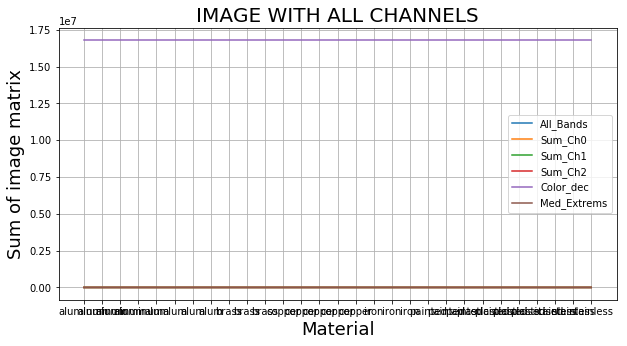

In [34]:
df_plot.plot(y=["All_Bands","Sum_Ch0","Sum_Ch1", "Sum_Ch2","Color_dec","Med_Extrems"],figsize=(10,5), grid=True )

# Obtain legend (xticks) for X axis
loc_Array_sum = np.arange(len(df_plot.index))
# Position of X labels
xtick_loc = list(loc_Array_sum)  
# Name of x labels
xticks = list(df_plot.Material)
#-------

#plt.plot(df_plot.Array_sum)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(xtick_loc, df_plot.Material, rotation=0)
plt.xlabel('Material',fontsize=18)
plt.show()

In [35]:
# Create pivot table
df_plot1 = df_plot.groupby('Material')['All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2','Color_dec',
                                       'Med_Extrems', 'Max_Histog', 'Idx_Max_Histog','Min_Histog','Idx_Min_Histog'].mean()
df_plot1

All_Bands     Sum_Ch0     Sum_Ch1     Sum_Ch2   Color_dec  \
Material                                                                  
alum         643.887981  216.204054  216.204054  211.479872  16777215.0   
aluminum     643.887981  216.204054  216.204054  211.479872  16777215.0   
brass        825.728515  276.826776  276.826776  272.074963  16777215.0   
copper       730.049184  244.939018  244.939018  240.171148  16777215.0   
iron         682.960808  229.237879  229.237879  224.485050  16777215.0   
painted      777.724374  260.814003  260.814003  256.096367  16777215.0   
plasticised  828.598597  277.780598  277.780598  273.037401  16777215.0   
stainless    691.437341  232.064396  232.064396  227.308549  16777215.0   

             Med_Extrems    Max_Histog  Idx_Max_Histog  Min_Histog  \
Material                                                             
alum          112.041667  58891.250000       44.750000         0.0   
aluminum      112.041667  58891.250000       44.750000         0.0   
brass         134.833333  40067.333333       52.000000         0.0   
copper        133.200000  74817.000000       78.000000         0.0   
iron          133.277778  58593.000000      113.333333         0.0   
painted       116.833333  61776.000000       74.666667         0.0   
plasticised   133.750000  52572.000000       21.000000         0.0   
stainless     133.000000  66608.666667      116.333333         0.0   

             Idx_Min_Histog  
Material                     
alum                    0.0  
aluminum                0.0  
brass                   0.0  
copper                  0.0  
iron                    0.0  
painted                 0.0  
plasticised             0.0  
stainless               0.0

In [36]:
color = ['red','blue','green','orange','cyan','black','yellow']

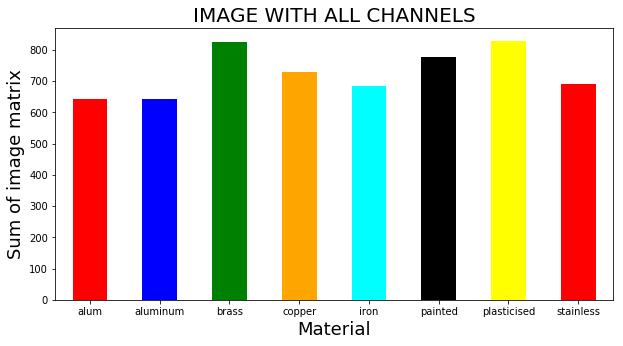

In [37]:
df_All_Bands = pd.DataFrame(df_plot1.All_Bands)

df_All_Bands.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.show()

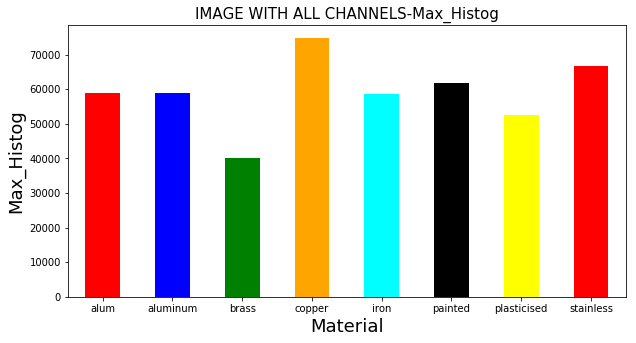

In [38]:
df_Max_Histog = pd.DataFrame(df_plot1.Max_Histog)

df_Max_Histog.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS-Max_Histog',fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Max_Histog',fontsize=18)
plt.show()

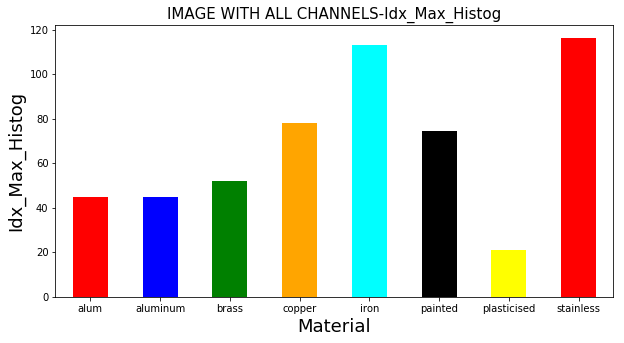

In [39]:
df_Idx_Max_Histog = pd.DataFrame(df_plot1.Idx_Max_Histog)

df_Idx_Max_Histog.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS-Idx_Max_Histog',fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Idx_Max_Histog',fontsize=18)
plt.show()

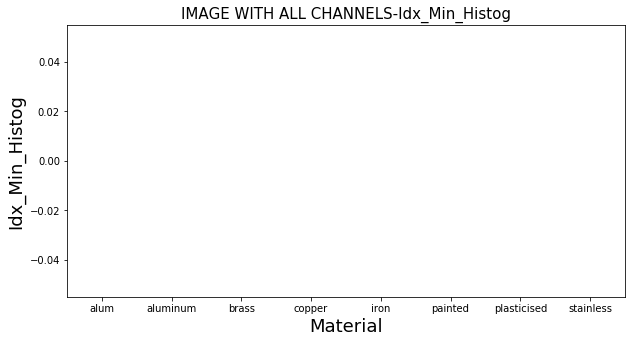

In [40]:
df_Idx_Min_Histog = pd.DataFrame(df_plot1.Idx_Min_Histog)

df_Idx_Min_Histog.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS-Idx_Min_Histog',fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Idx_Min_Histog',fontsize=18)
plt.show()

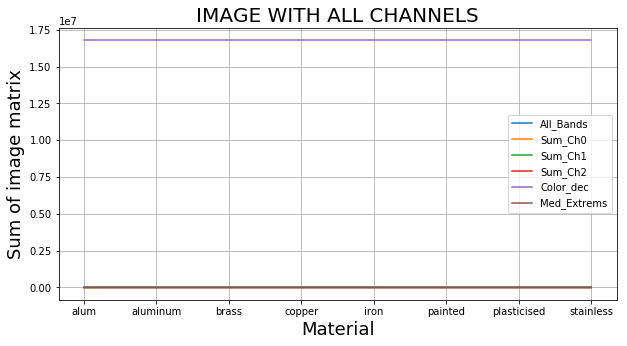

In [41]:
loc_Array_sum = np.arange(len(df_plot1.index))
xtick_loc = list(loc_Array_sum)  
xticks = list(df_plot1.index)

df_plot1.plot( y=["All_Bands","Sum_Ch0","Sum_Ch1", "Sum_Ch2","Color_dec","Med_Extrems"],figsize=(10,5), grid=True )
plt.xticks(xtick_loc, df_plot1.index, rotation=0)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.show()

In [42]:
df_plot1

All_Bands     Sum_Ch0     Sum_Ch1     Sum_Ch2   Color_dec  \
Material                                                                  
alum         643.887981  216.204054  216.204054  211.479872  16777215.0   
aluminum     643.887981  216.204054  216.204054  211.479872  16777215.0   
brass        825.728515  276.826776  276.826776  272.074963  16777215.0   
copper       730.049184  244.939018  244.939018  240.171148  16777215.0   
iron         682.960808  229.237879  229.237879  224.485050  16777215.0   
painted      777.724374  260.814003  260.814003  256.096367  16777215.0   
plasticised  828.598597  277.780598  277.780598  273.037401  16777215.0   
stainless    691.437341  232.064396  232.064396  227.308549  16777215.0   

             Med_Extrems    Max_Histog  Idx_Max_Histog  Min_Histog  \
Material                                                             
alum          112.041667  58891.250000       44.750000         0.0   
aluminum      112.041667  58891.250000       44.750000         0.0   
brass         134.833333  40067.333333       52.000000         0.0   
copper        133.200000  74817.000000       78.000000         0.0   
iron          133.277778  58593.000000      113.333333         0.0   
painted       116.833333  61776.000000       74.666667         0.0   
plasticised   133.750000  52572.000000       21.000000         0.0   
stainless     133.000000  66608.666667      116.333333         0.0   

             Idx_Min_Histog  
Material                     
alum                    0.0  
aluminum                0.0  
brass                   0.0  
copper                  0.0  
iron                    0.0  
painted                 0.0  
plasticised             0.0  
stainless               0.0

In [43]:
df_plot2 =  df_plot1 

df_plot2


All_Bands     Sum_Ch0     Sum_Ch1     Sum_Ch2   Color_dec  \
Material                                                                  
alum         643.887981  216.204054  216.204054  211.479872  16777215.0   
aluminum     643.887981  216.204054  216.204054  211.479872  16777215.0   
brass        825.728515  276.826776  276.826776  272.074963  16777215.0   
copper       730.049184  244.939018  244.939018  240.171148  16777215.0   
iron         682.960808  229.237879  229.237879  224.485050  16777215.0   
painted      777.724374  260.814003  260.814003  256.096367  16777215.0   
plasticised  828.598597  277.780598  277.780598  273.037401  16777215.0   
stainless    691.437341  232.064396  232.064396  227.308549  16777215.0   

             Med_Extrems    Max_Histog  Idx_Max_Histog  Min_Histog  \
Material                                                             
alum          112.041667  58891.250000       44.750000         0.0   
aluminum      112.041667  58891.250000       44.750000         0.0   
brass         134.833333  40067.333333       52.000000         0.0   
copper        133.200000  74817.000000       78.000000         0.0   
iron          133.277778  58593.000000      113.333333         0.0   
painted       116.833333  61776.000000       74.666667         0.0   
plasticised   133.750000  52572.000000       21.000000         0.0   
stainless     133.000000  66608.666667      116.333333         0.0   

             Idx_Min_Histog  
Material                     
alum                    0.0  
aluminum                0.0  
brass                   0.0  
copper                  0.0  
iron                    0.0  
painted                 0.0  
plasticised             0.0  
stainless               0.0

In [44]:
df_plot2.Med_Extrems    = df_plot2.Med_Extrems + 2000
df_plot2.Max_Histog     = df_plot2.Max_Histog  + 1500
df_plot2.Idx_Max_Histog = df_plot2.Idx_Max_Histog + 1000
df_plot2.Min_Histog     = df_plot2.Min_Histog + 500
df_plot2.Idx_Min_Histog = df_plot2.Idx_Min_Histog + 100
df_plot2.head()

All_Bands     Sum_Ch0     Sum_Ch1     Sum_Ch2   Color_dec  \
Material                                                               
alum      643.887981  216.204054  216.204054  211.479872  16777215.0   
aluminum  643.887981  216.204054  216.204054  211.479872  16777215.0   
brass     825.728515  276.826776  276.826776  272.074963  16777215.0   
copper    730.049184  244.939018  244.939018  240.171148  16777215.0   
iron      682.960808  229.237879  229.237879  224.485050  16777215.0   

          Med_Extrems    Max_Histog  Idx_Max_Histog  Min_Histog  \
Material                                                          
alum      2112.041667  60391.250000     1044.750000       500.0   
aluminum  2112.041667  60391.250000     1044.750000       500.0   
brass     2134.833333  41567.333333     1052.000000       500.0   
copper    2133.200000  76317.000000     1078.000000       500.0   
iron      2133.277778  60093.000000     1113.333333       500.0   

          Idx_Min_Histog  
Material                  
alum               100.0  
aluminum           100.0  
brass              100.0  
copper             100.0  
iron               100.0

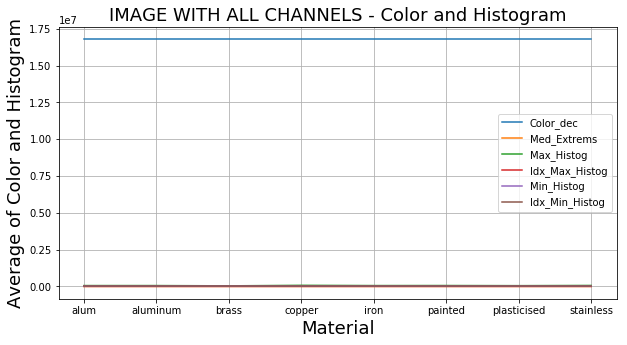

In [45]:
loc_Array_sum = np.arange(len(df_plot2.index))
xtick_loc = list(loc_Array_sum)  
xticks = list(df_plot1.index)

df_plot2.plot( y=['Color_dec','Med_Extrems', 'Max_Histog', 'Idx_Max_Histog',
                  'Min_Histog','Idx_Min_Histog'],figsize=(10,5), grid=True )
plt.xticks(xtick_loc, df_plot2.index, rotation=0)
plt.title('IMAGE WITH ALL CHANNELS - Color and Histogram',fontsize=18)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of Color and Histogram',fontsize=18)
plt.show()

In [46]:
loc_Array_sum = np.arange(len(df_plot1.index))+0.1 # Offsetting the tick-label location
loc_r = np.arange(len(df_plot1.index))-0.1 # Offsetting the tick-label location
loc_g = np.arange(len(df_plot1.index))-0.3 # Offsetting the tick-label location
loc_b = np.arange(len(df_plot1.index))-0.5 # Offsetting the tick-label location

xtick_loc = list(loc_g)  
xticks = list(df_plot1.index)

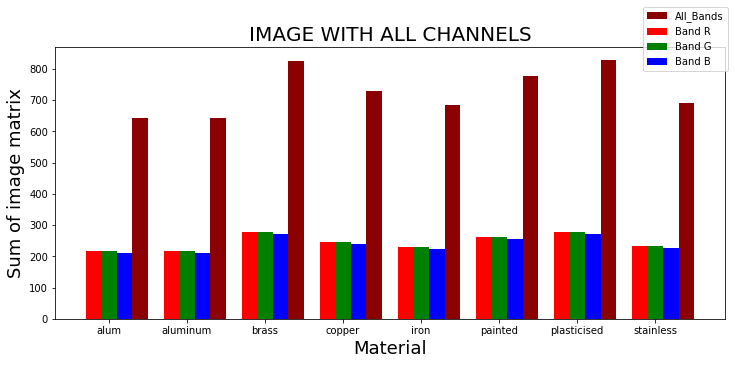

In [47]:
#Plot  Bar Graph
#df_plot1.plot(kind='bar', figsize=(12,5), grid=True, color='darkred',fontsize=18)
loc_Array_sum = np.arange(len(df_plot1.index))+0.1 # Offsetting the tick-label location
loc_b = np.arange(len(df_plot1.index))-0.1 # Offsetting the tick-label location
loc_g = np.arange(len(df_plot1.index))-0.3 # Offsetting the tick-label location
loc_r = np.arange(len(df_plot1.index))-0.5 # Offsetting the tick-label location

#xtick_loc = list(loc_Array_sum) + list(loc_r) + list(loc_g) + list(loc_b)
#xticks = list(selected.keys())+ list(rejected.keys())
colors = ['darkred','red','green','blue','orange','cyan','black','yellow']
plt.figure(figsize=(12,5))

plt.bar(loc_Array_sum, df_plot1.All_Bands, color=colors[0], width=0.2, label='All_Bands')
plt.bar(loc_r, df_plot1.Sum_Ch0, color=colors[1], width=0.2,label='Band R')
plt.bar(loc_g, df_plot1.Sum_Ch1, color=colors[2], width=0.2,label='Band G')
plt.bar(loc_b, df_plot1.Sum_Ch2, color=colors[3], width=0.2,label='Band B')

plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(xtick_loc, xticks, rotation=0)
plt.legend(bbox_to_anchor=(.8,0.8),\
    bbox_transform=plt.gcf().transFigure)

plt.show()

<Figure size 432x288 with 0 Axes>

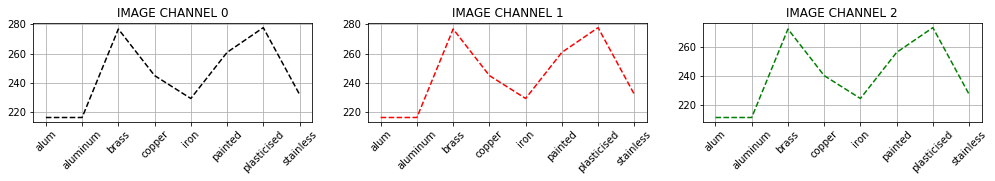

In [48]:
plt.figure(1)
plt.figure(figsize=(17, 4))
plt.tight_layout()
plt.subplot(231)
plt.title('IMAGE CHANNEL 0')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_plot1.Sum_Ch0, 'k--')

plt.subplot(232)
plt.title('IMAGE CHANNEL 1')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_plot1.Sum_Ch1,  'r--')

plt.subplot(233)
plt.title('IMAGE CHANNEL 2')
plt.xticks(rotation=45)
plt.plot(df_plot1.Sum_Ch2,  'g--')
plt.grid(True)
plt.show()

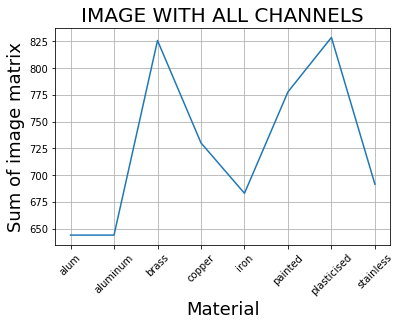

In [49]:
# Plot channel based
plt.plot(df_plot1.All_Bands)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

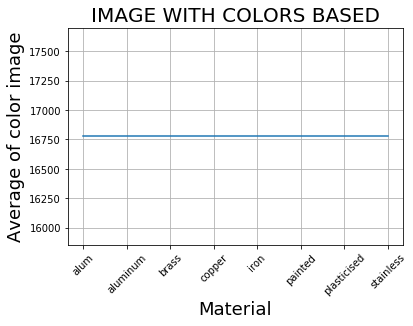

In [50]:
# Plot based on color
plt.plot(df_plot1.Color_dec/1000)
plt.title('IMAGE WITH COLORS BASED',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of color image',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

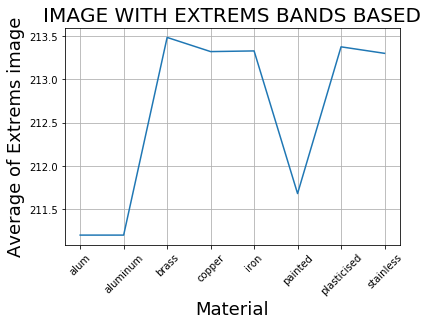

In [51]:
# Plot based on Extrems of the Bands
plt.plot(df_plot1.Med_Extrems/10)
plt.title('IMAGE WITH EXTREMS BANDS BASED',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of Extrems image',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create Histograms

https://www.cambridgeincolour.com/pt-br/tutoriais/histograms1.htm

https://www.cambridgeincolour.com/pt-br/tutoriais/image-noise.htm

http://www2.ic.uff.br/~aconci/aula-2-2015-AI.pdf

https://www.ic.unicamp.br/~ra144681/misc/files/ApostilaProcDeImagesParteI.pdf

histograma, também conhecido como distribuição de frequências ou diagrama das frequências, é a representação gráfica, em colunas (retângulos), de um conjunto de dados previamente tabulado e dividido em classes uniformes.

Histogramas:

O histograma de uma imagem cinza e uma funcao discreta h(l) (vetor) que produz o numero de ocorrencias de cada nıvel de cinza na imagem. O histograma normalizado h(l)/|DI | representa a distribuicao de probabilidade dos valores dos pixels.
 
Imagens claras possuem histogramas com altas concentracoes de pixels de alto brilho. Imagens escuras possuem histogramas com altas concentracoes de pixels de baixo brilho. O contraste maior esta associado a um grau maior de dispersao do histograma.

No caso de imagens multiespectrais, cada banda e´ requantizada em um certo numero de intervalos, de forma que o espaco de caracterısticas Zk ´e dividido em hipercubos (bins do histograma). A contagem de cores em cada bin ´e usada no c´alculo do histograma. Assim, para cada bin, precisamos analisar os n´ıveis de cinza das 3 bandas da imagem colorida (RGB).

Entendendo Histogramas:

O histograma mostra a frequencia dos valores de brilho da imagem, ou seja, a quantidade de luz presente na imagem. 


In [52]:
list_of_images

['aluminum_001.tif',
 'aluminum_002.tif',
 'aluminum_003.tif',
 'aluminum_004.tif',
 'alum_001.tif',
 'alum_002.tif',
 'alum_003.tif',
 'alum_004.tif',
 'brass_001.tif',
 'brass_002.tif',
 'brass_003.tif',
 'copper_001.tif',
 'copper_002.tif',
 'copper_003.tif',
 'copper_004.tif',
 'copper_005.tif',
 'iron_001.tif',
 'iron_002.tif',
 'iron_003.tif',
 'painted_iron_001.tif',
 'painted_iron_002.tif',
 'painted_iron_003.tif',
 'plasticised_copper_wire_001.tif',
 'plasticised_copper_wire_002.tif',
 'plasticised_copper_wire_003.tif',
 'plasticised_copper_wire_004.tif',
 'stainless_steel_001.tif',
 'stainless_steel_002.tif',
 'stainless_steel_003.tif']

In [53]:
path = mypath + '/' + folder + '/'
path

'C:\\Users\\manuel.robalinho\\Google Drive\\UPT_Portucalense\\Trabalho final\\Classificacao_Sucata\\Jupyter_Notebook/imagedata01/'

In [54]:
list_of_images

['aluminum_001.tif',
 'aluminum_002.tif',
 'aluminum_003.tif',
 'aluminum_004.tif',
 'alum_001.tif',
 'alum_002.tif',
 'alum_003.tif',
 'alum_004.tif',
 'brass_001.tif',
 'brass_002.tif',
 'brass_003.tif',
 'copper_001.tif',
 'copper_002.tif',
 'copper_003.tif',
 'copper_004.tif',
 'copper_005.tif',
 'iron_001.tif',
 'iron_002.tif',
 'iron_003.tif',
 'painted_iron_001.tif',
 'painted_iron_002.tif',
 'painted_iron_003.tif',
 'plasticised_copper_wire_001.tif',
 'plasticised_copper_wire_002.tif',
 'plasticised_copper_wire_003.tif',
 'plasticised_copper_wire_004.tif',
 'stainless_steel_001.tif',
 'stainless_steel_002.tif',
 'stainless_steel_003.tif']

Cv2 Histogram for File: aluminum_001.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_001.tif


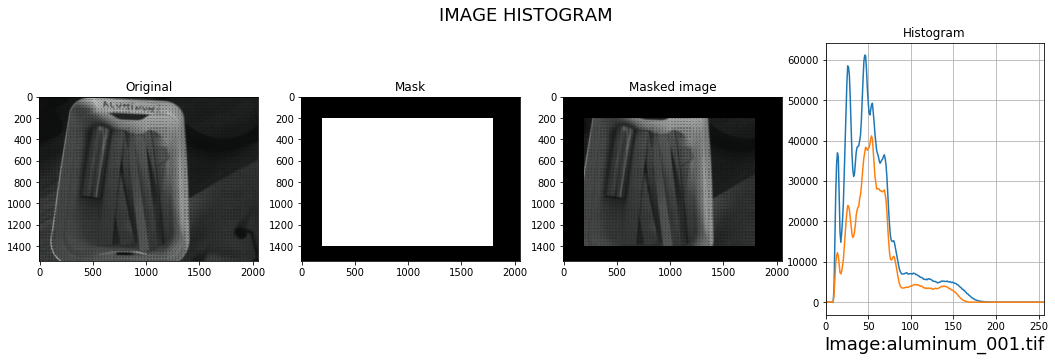

Cv2 Histogram for File: aluminum_002.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_002.tif


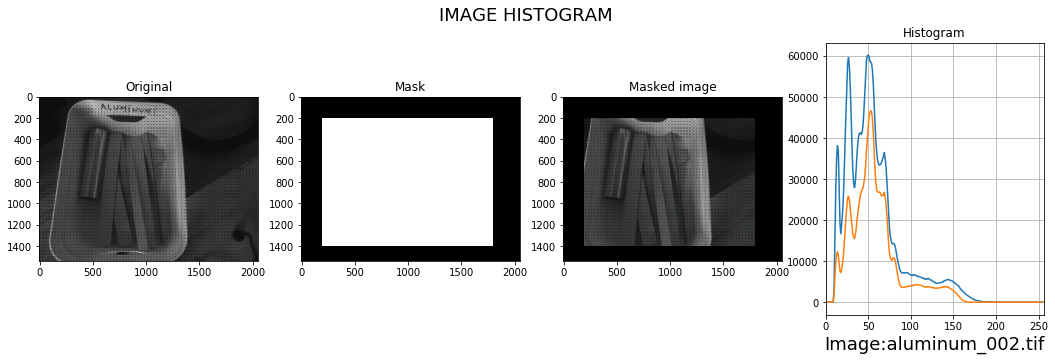

Cv2 Histogram for File: aluminum_003.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_003.tif


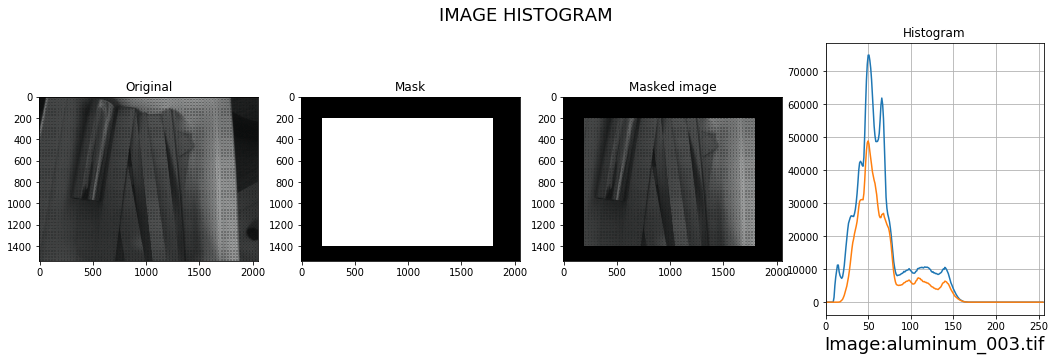

Cv2 Histogram for File: aluminum_004.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_004.tif


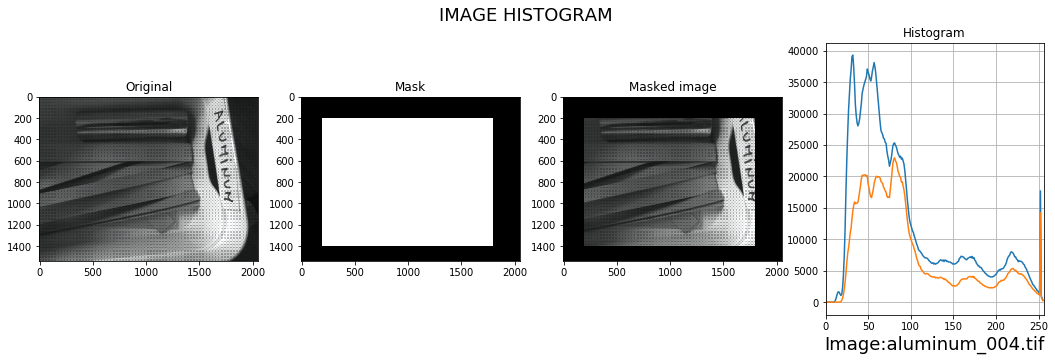

Cv2 Histogram for File: alum_001.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_001.tif


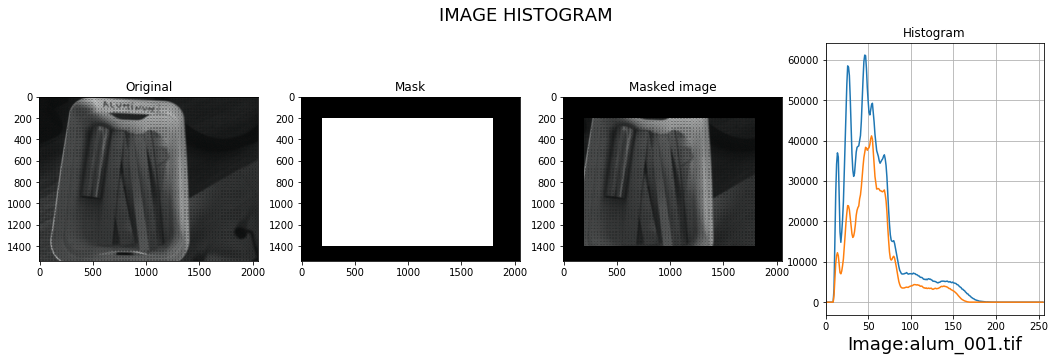

Cv2 Histogram for File: alum_002.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_002.tif


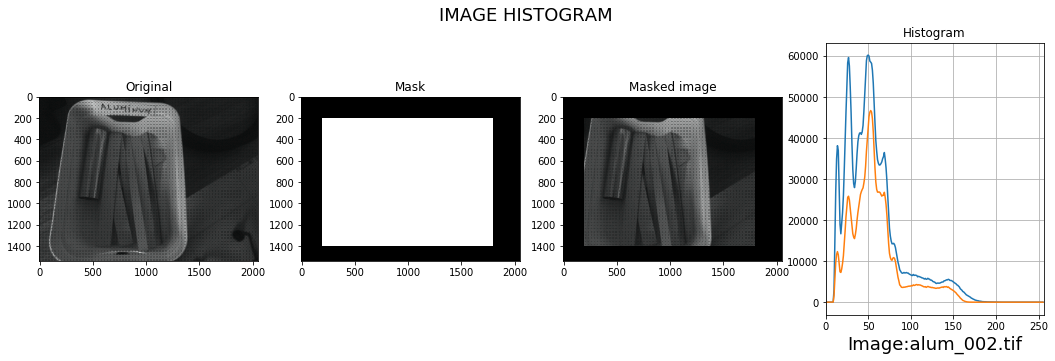

Cv2 Histogram for File: alum_003.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_003.tif


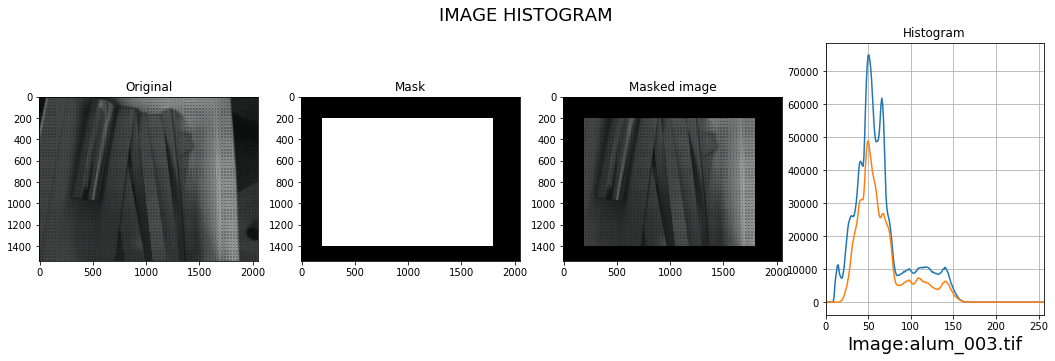

Cv2 Histogram for File: alum_004.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_004.tif


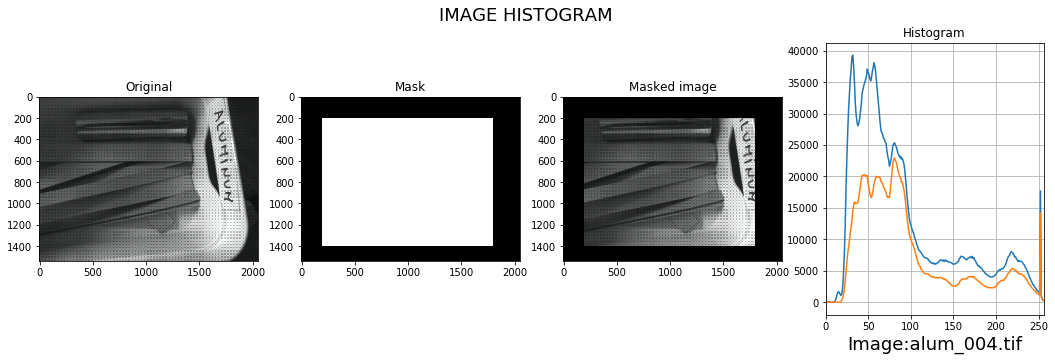

Cv2 Histogram for File: brass_001.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/brass_001.tif


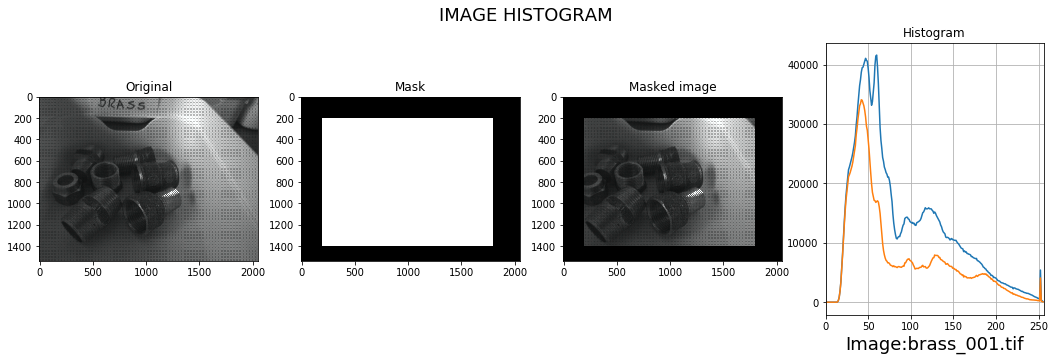

Cv2 Histogram for File: brass_002.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/brass_002.tif


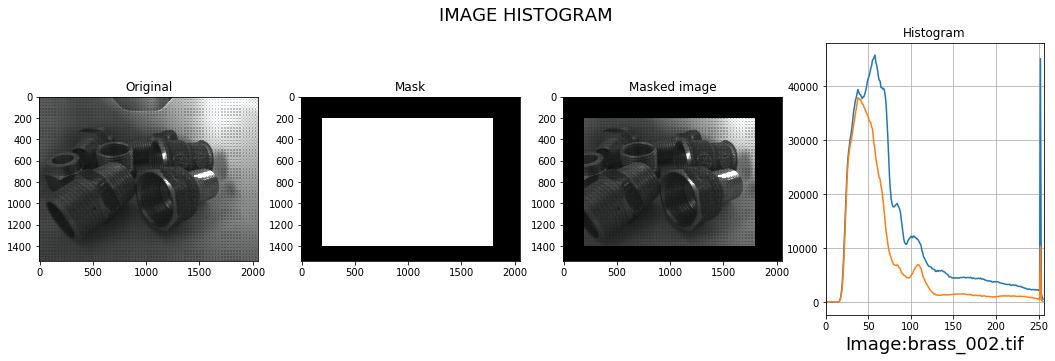

Cv2 Histogram for File: brass_003.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/brass_003.tif


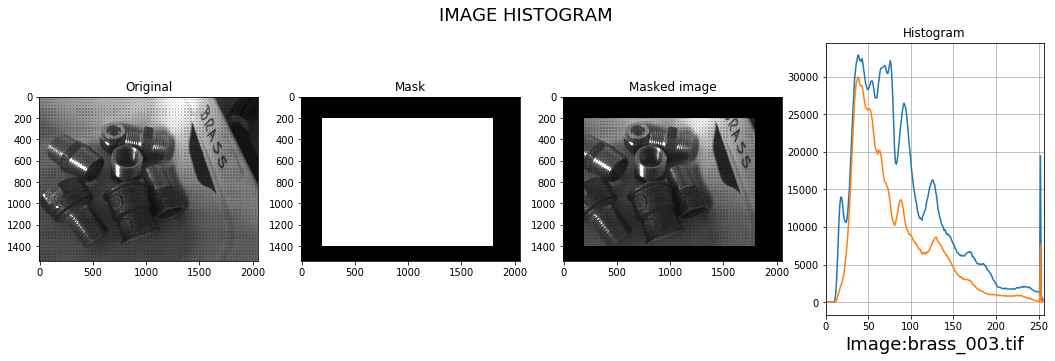

Cv2 Histogram for File: copper_001.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_001.tif


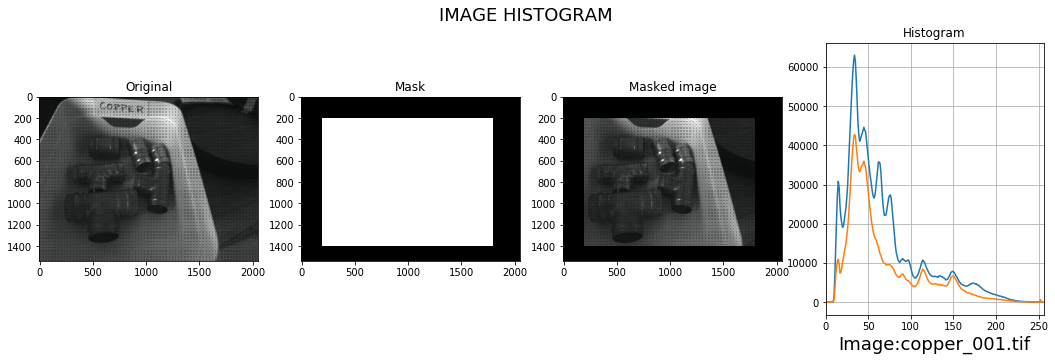

Cv2 Histogram for File: copper_002.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_002.tif


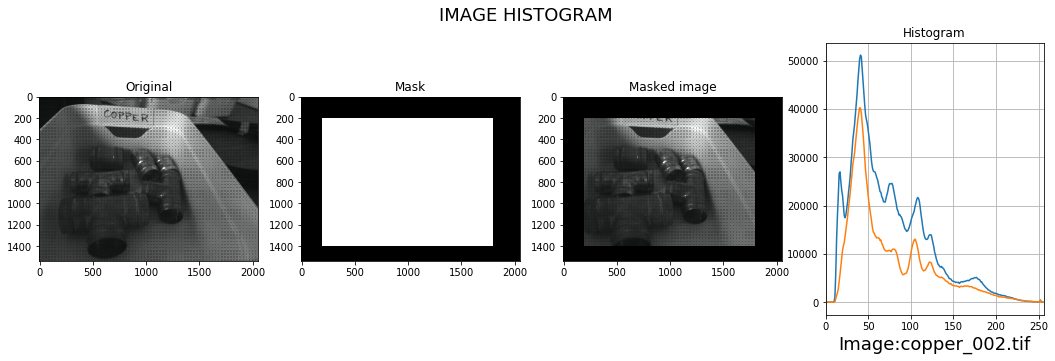

Cv2 Histogram for File: copper_003.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_003.tif


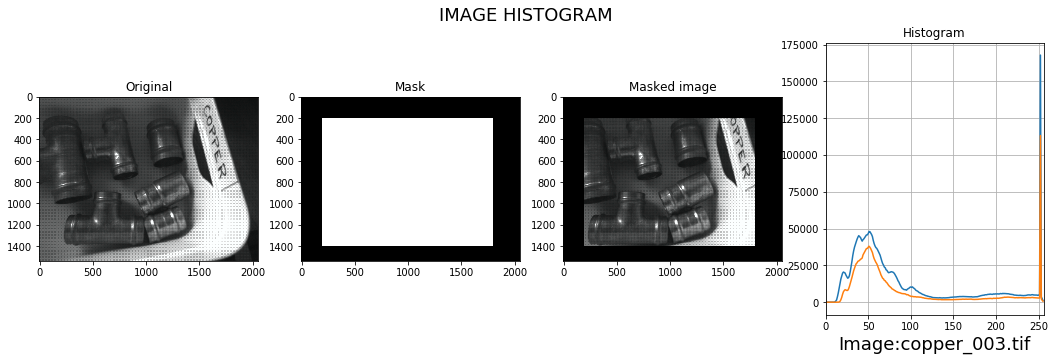

Cv2 Histogram for File: copper_004.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_004.tif


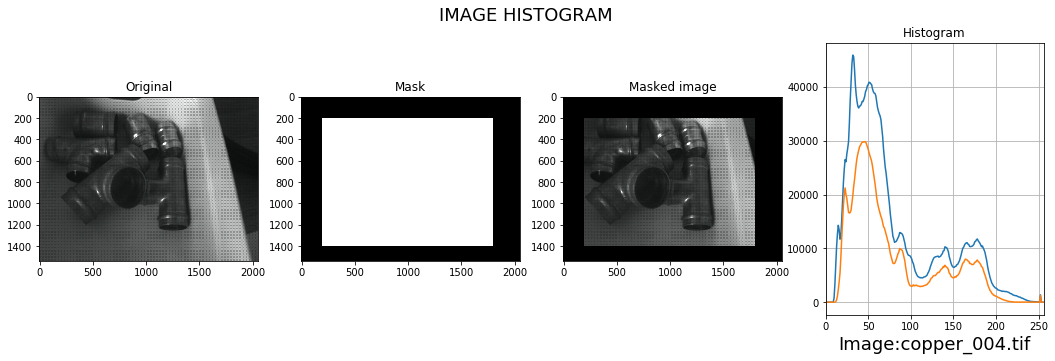

Cv2 Histogram for File: copper_005.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_005.tif


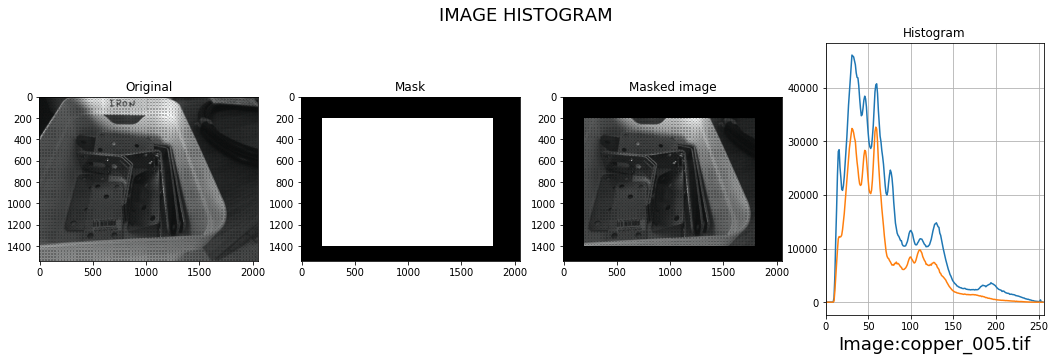

Cv2 Histogram for File: iron_001.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/iron_001.tif


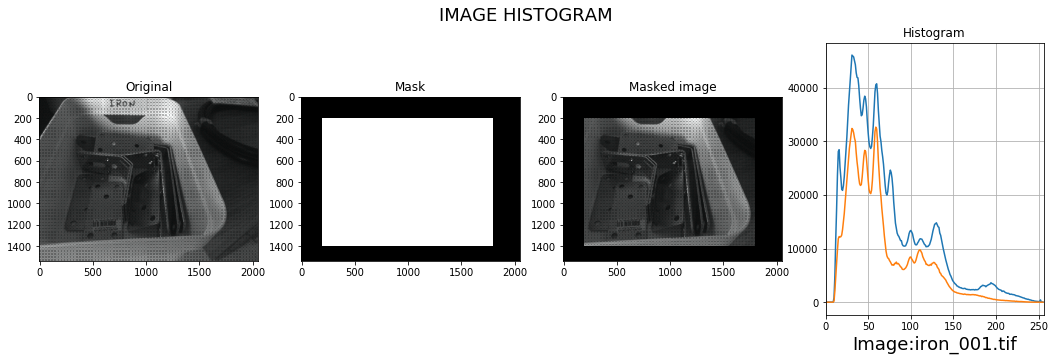

Cv2 Histogram for File: iron_002.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/iron_002.tif


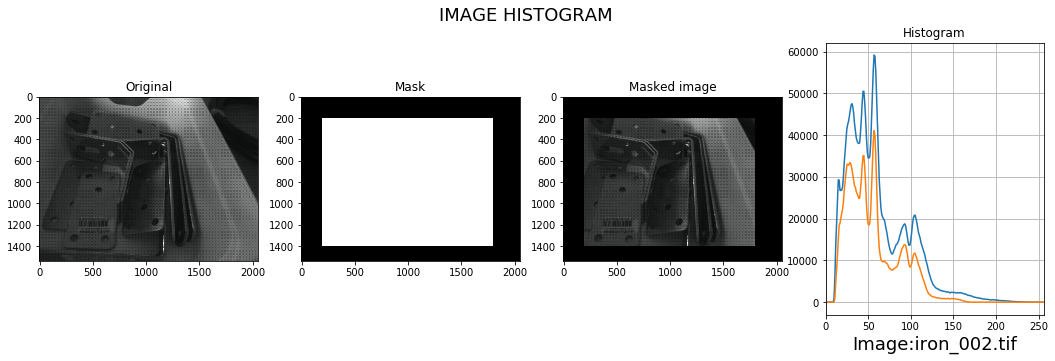

Cv2 Histogram for File: iron_003.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/iron_003.tif


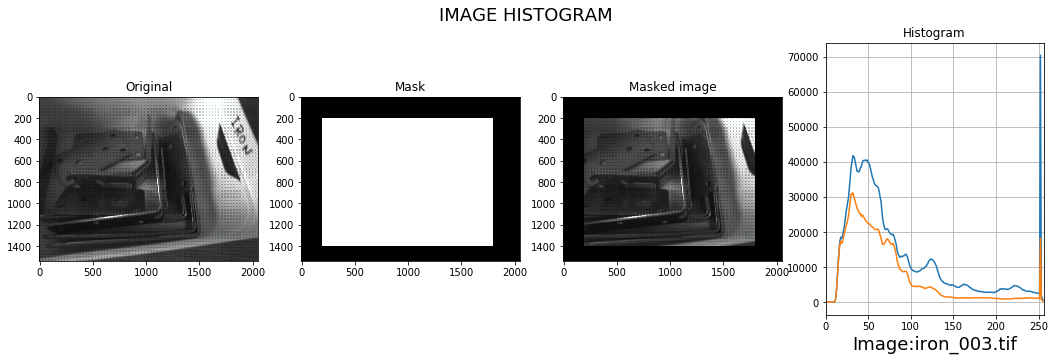

Cv2 Histogram for File: painted_iron_001.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/painted_iron_001.tif


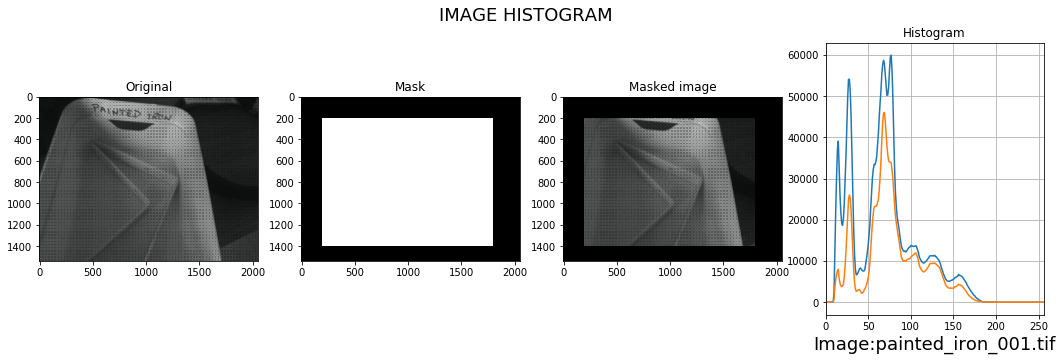

Cv2 Histogram for File: painted_iron_002.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/painted_iron_002.tif


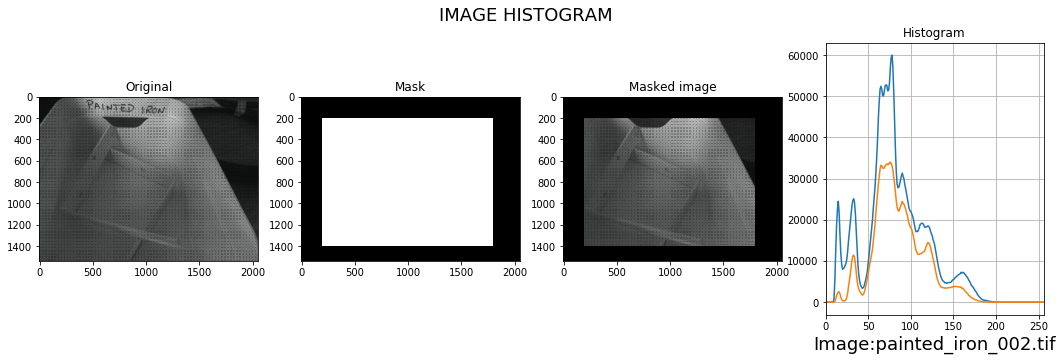

Cv2 Histogram for File: painted_iron_003.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/painted_iron_003.tif


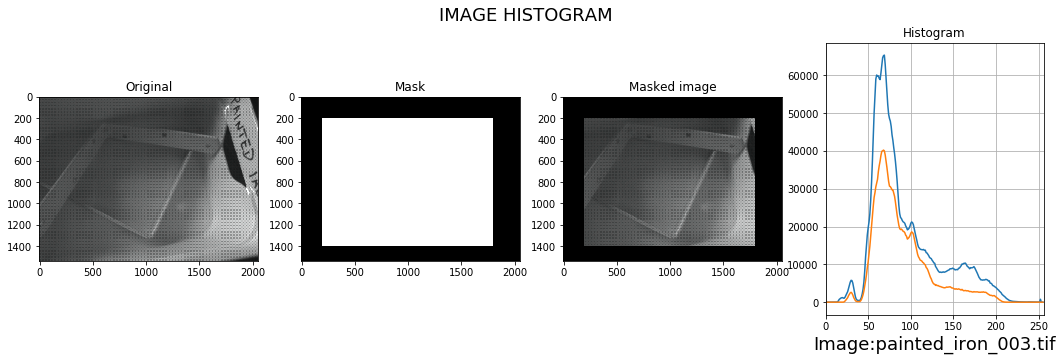

Cv2 Histogram for File: plasticised_copper_wire_001.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_001.tif


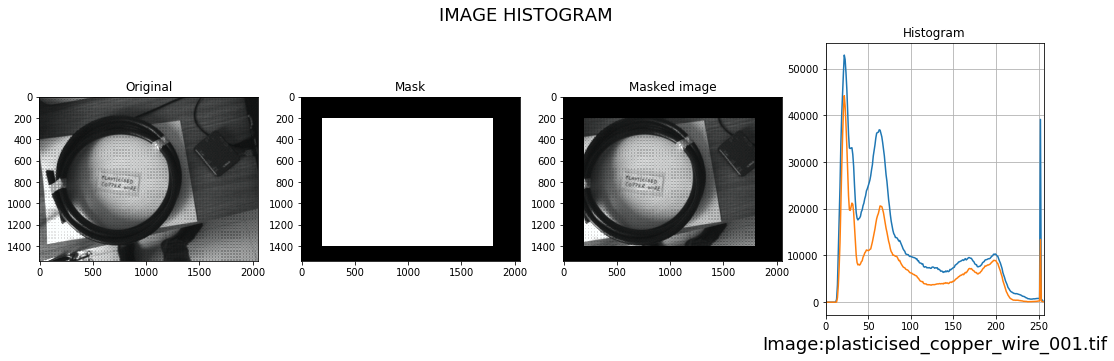

Cv2 Histogram for File: plasticised_copper_wire_002.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_002.tif


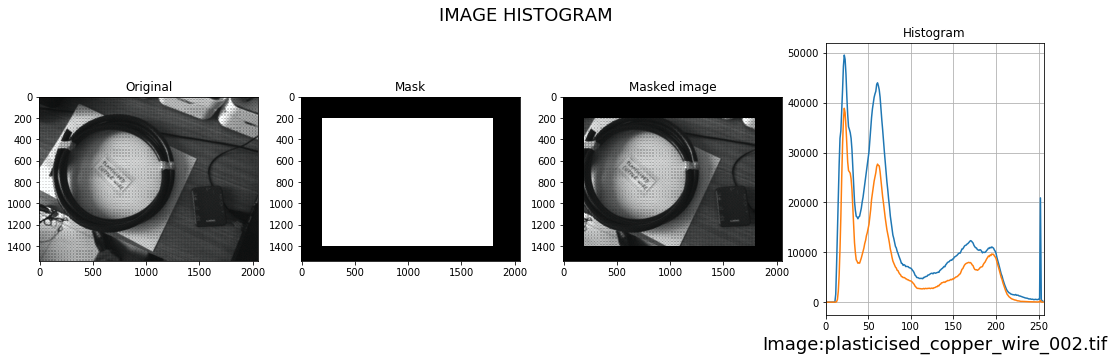

Cv2 Histogram for File: plasticised_copper_wire_003.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_003.tif


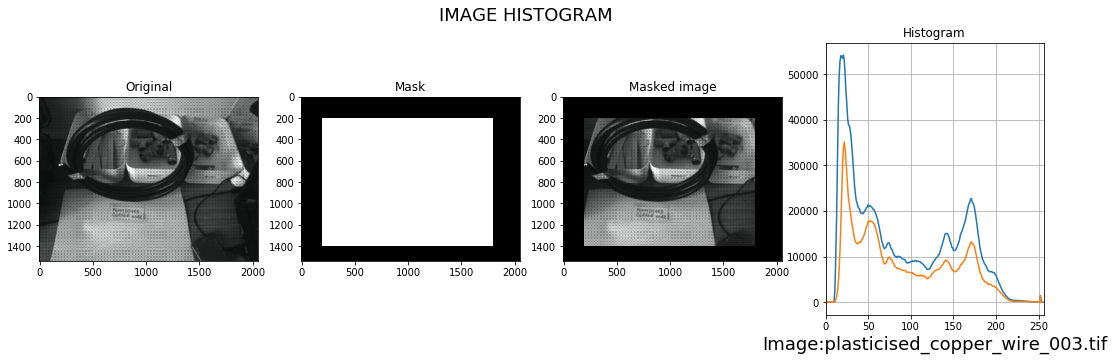

Cv2 Histogram for File: plasticised_copper_wire_004.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_004.tif


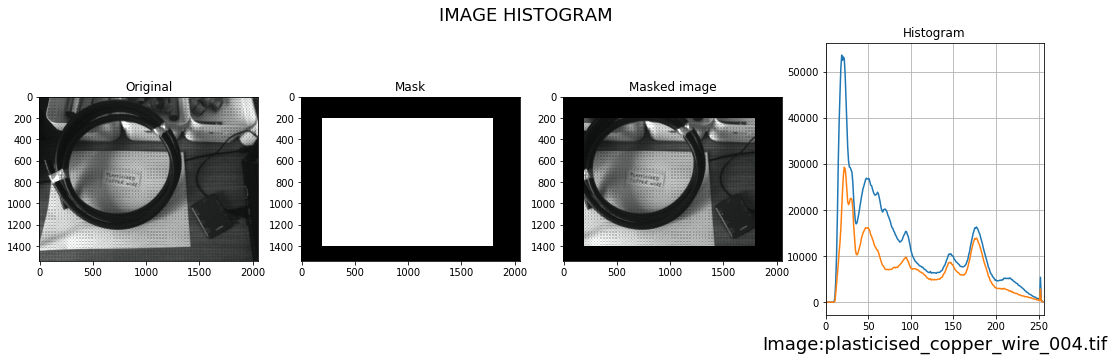

Cv2 Histogram for File: stainless_steel_001.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/stainless_steel_001.tif


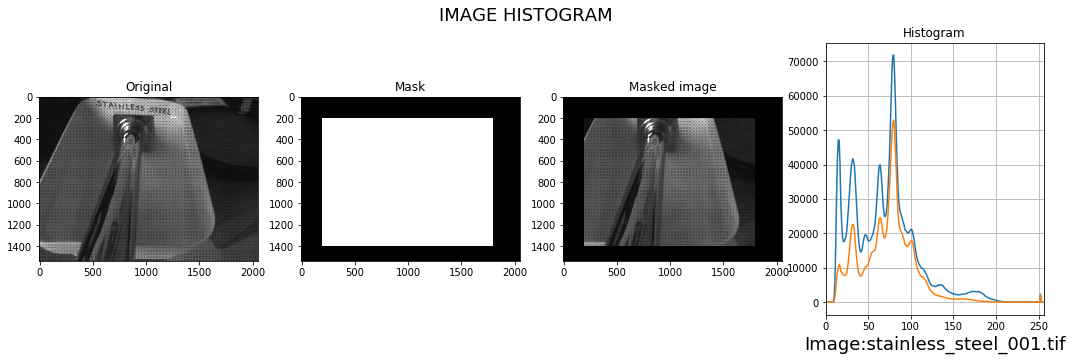

Cv2 Histogram for File: stainless_steel_002.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/stainless_steel_002.tif


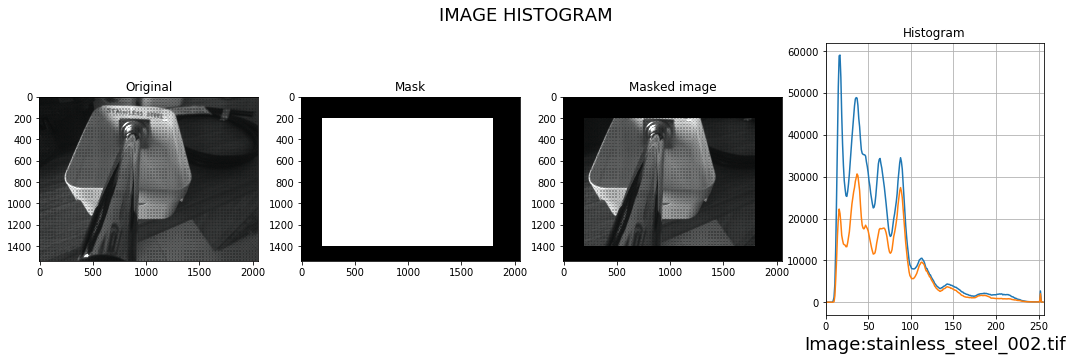

Cv2 Histogram for File: stainless_steel_003.tif
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/stainless_steel_003.tif


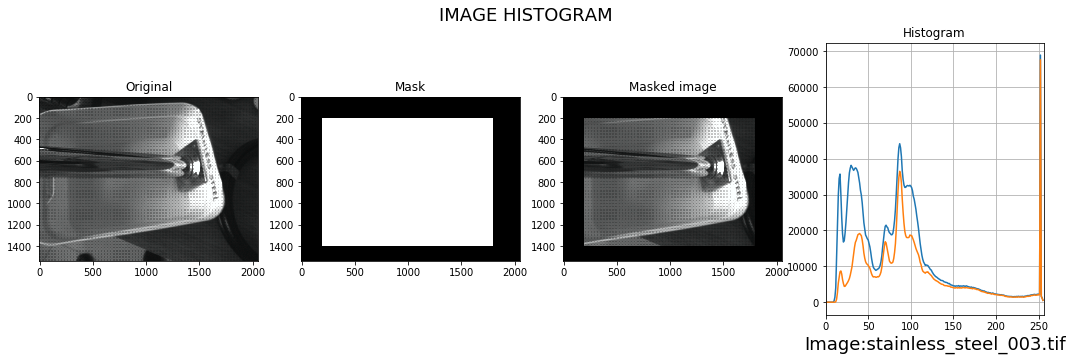

In [55]:
# HISTOGRAMS
# Print Histograms for all folder images
# list_of_images has all the name files

for x in list_of_images:
    print('Cv2 Histogram for File:', x)
    print_cv_hist(path, x)

Matplot Histogram for File: aluminum_001.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_001.tif


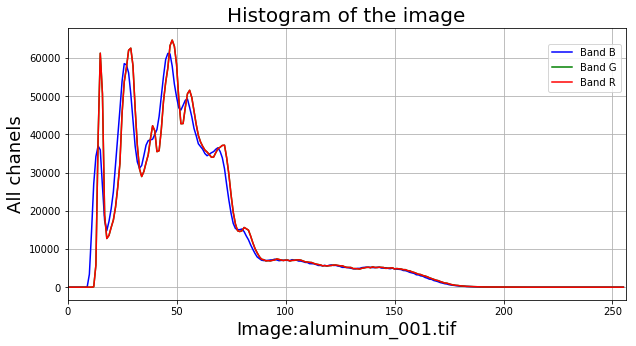

Matplot Histogram for File: aluminum_002.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_002.tif


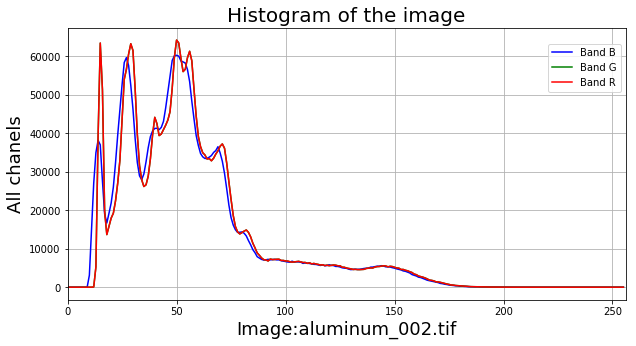

Matplot Histogram for File: aluminum_003.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_003.tif


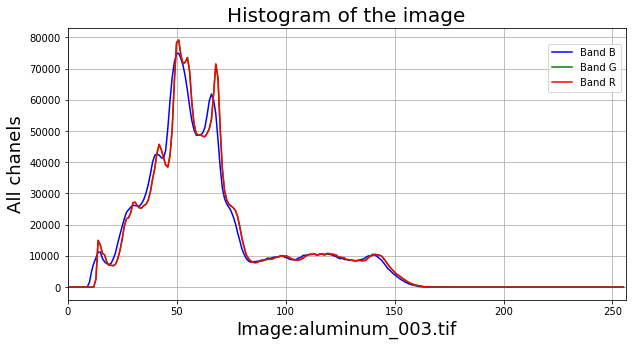

Matplot Histogram for File: aluminum_004.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/aluminum_004.tif


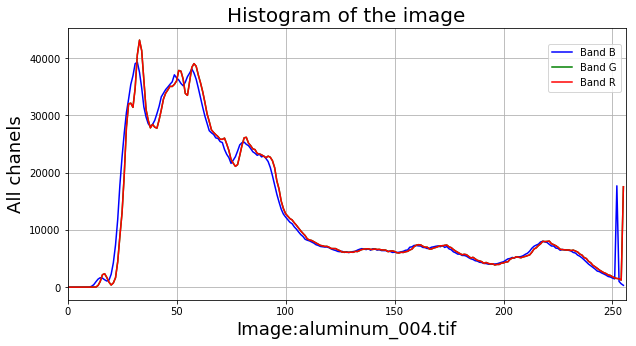

Matplot Histogram for File: alum_001.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_001.tif


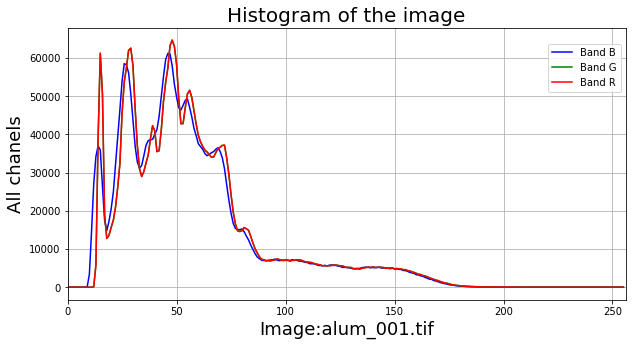

Matplot Histogram for File: alum_002.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_002.tif


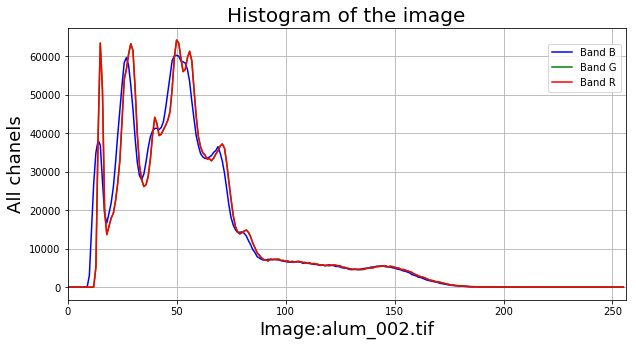

Matplot Histogram for File: alum_003.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_003.tif


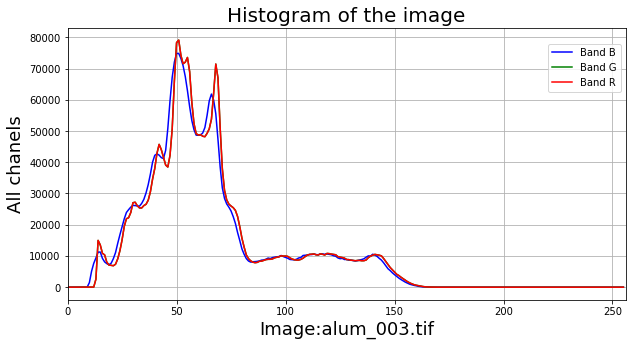

Matplot Histogram for File: alum_004.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/alum_004.tif


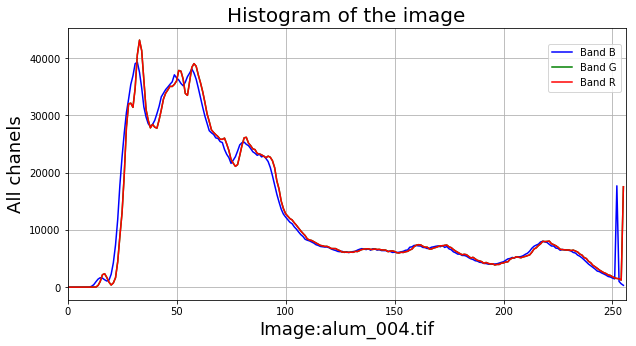

Matplot Histogram for File: brass_001.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/brass_001.tif


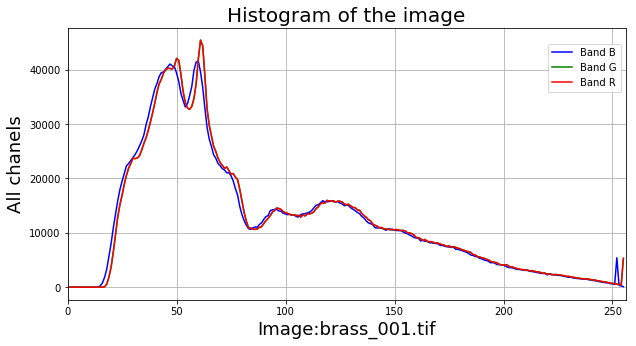

Matplot Histogram for File: brass_002.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/brass_002.tif


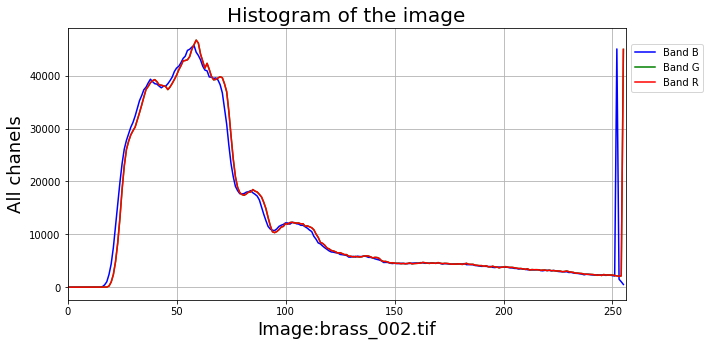

Matplot Histogram for File: brass_003.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/brass_003.tif


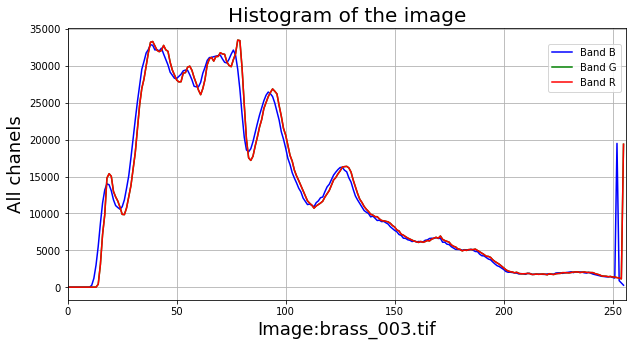

Matplot Histogram for File: copper_001.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_001.tif


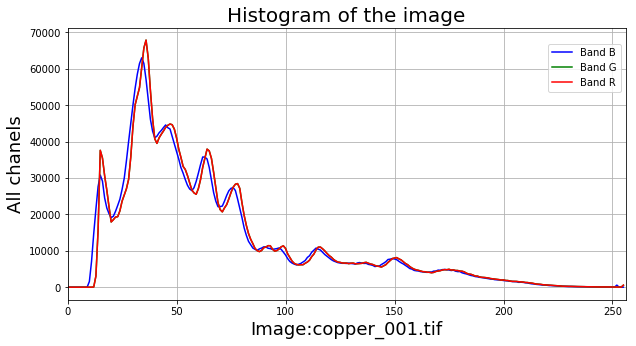

Matplot Histogram for File: copper_002.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_002.tif


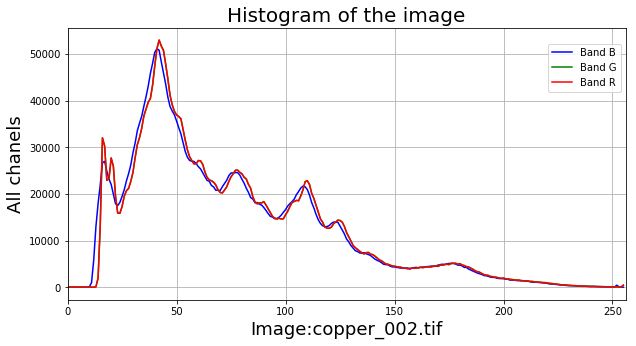

Matplot Histogram for File: copper_003.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_003.tif


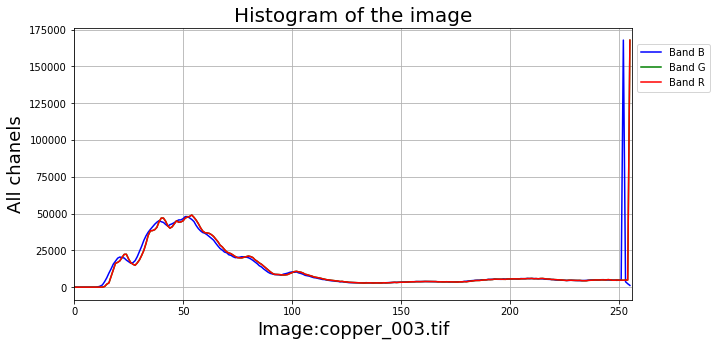

Matplot Histogram for File: copper_004.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_004.tif


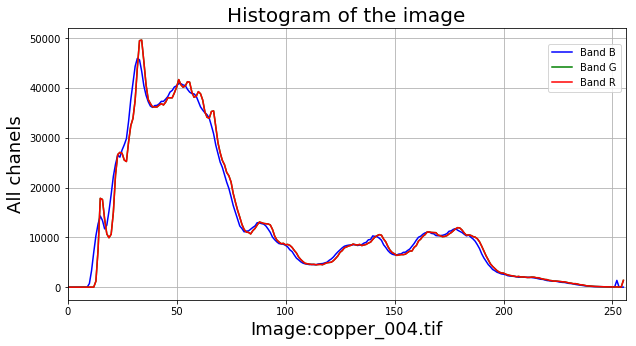

Matplot Histogram for File: copper_005.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/copper_005.tif


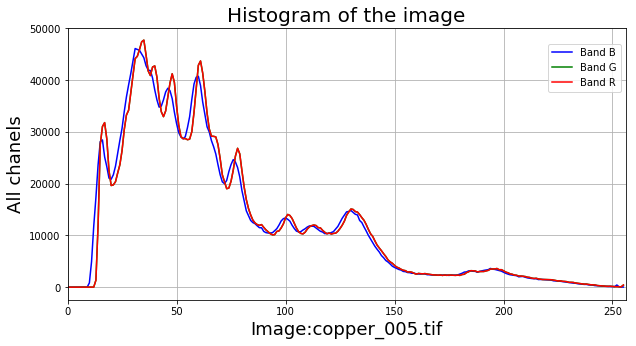

Matplot Histogram for File: iron_001.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/iron_001.tif


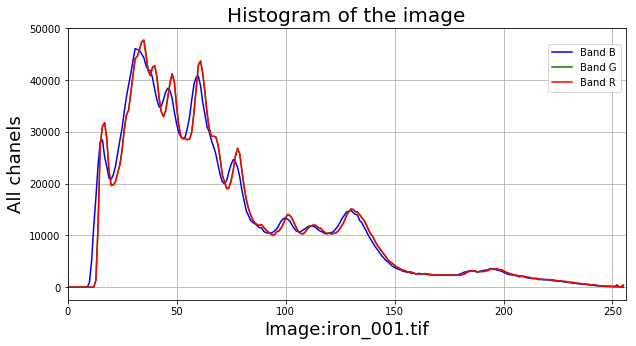

Matplot Histogram for File: iron_002.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/iron_002.tif


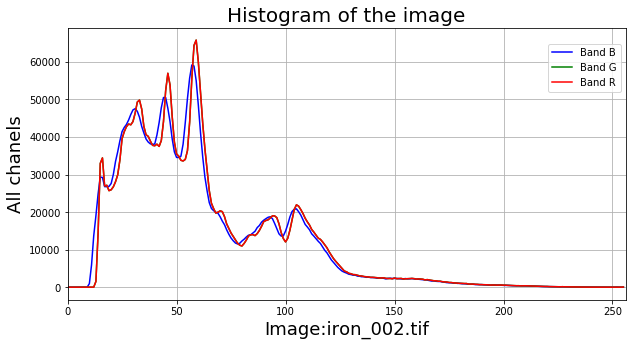

Matplot Histogram for File: iron_003.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/iron_003.tif


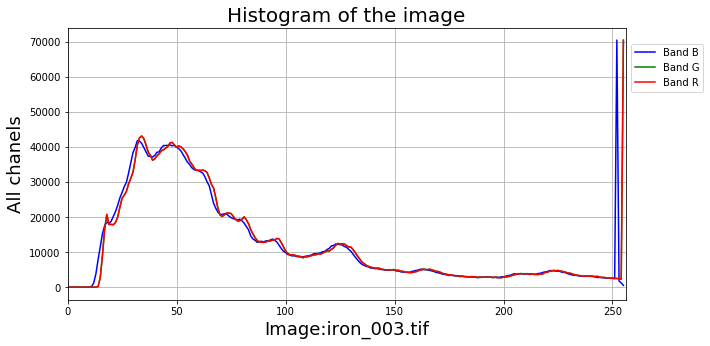

Matplot Histogram for File: painted_iron_001.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/painted_iron_001.tif


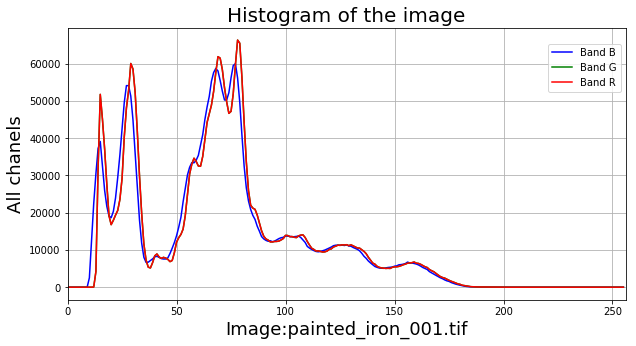

Matplot Histogram for File: painted_iron_002.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/painted_iron_002.tif


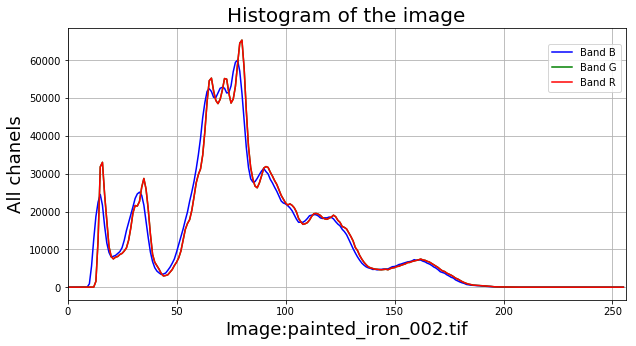

Matplot Histogram for File: painted_iron_003.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/painted_iron_003.tif


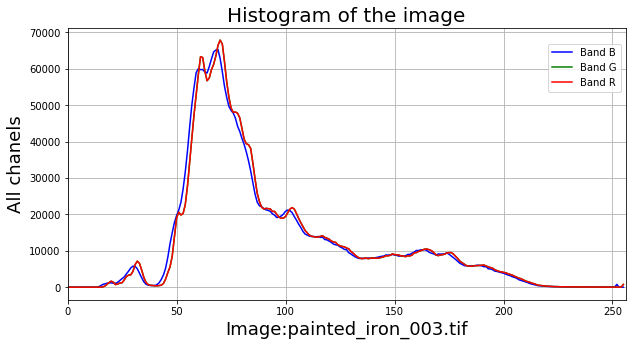

Matplot Histogram for File: plasticised_copper_wire_001.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_001.tif


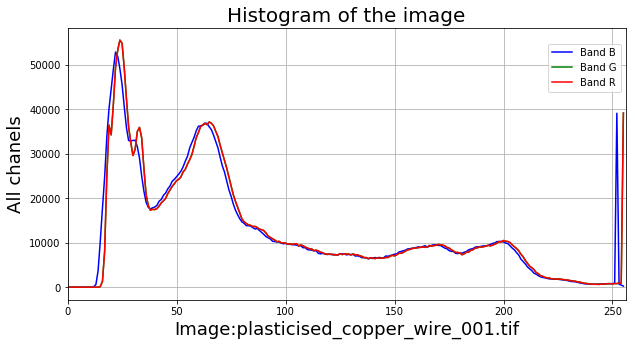

Matplot Histogram for File: plasticised_copper_wire_002.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_002.tif


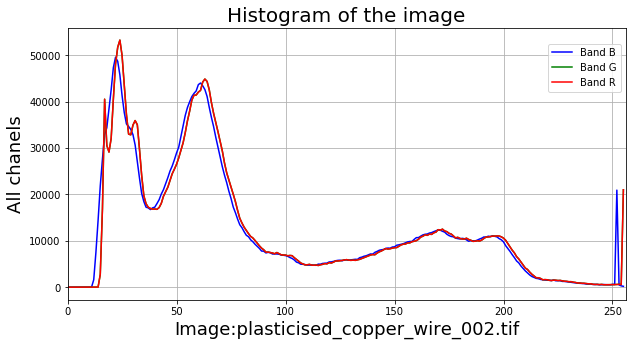

Matplot Histogram for File: plasticised_copper_wire_003.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_003.tif


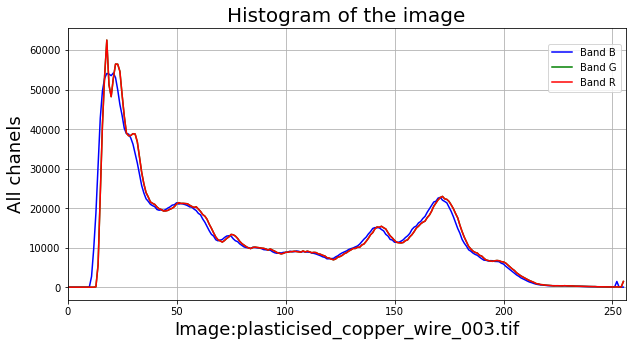

Matplot Histogram for File: plasticised_copper_wire_004.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/plasticised_copper_wire_004.tif


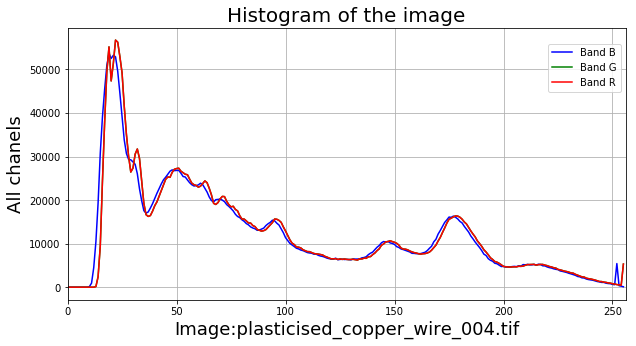

Matplot Histogram for File: stainless_steel_001.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/stainless_steel_001.tif


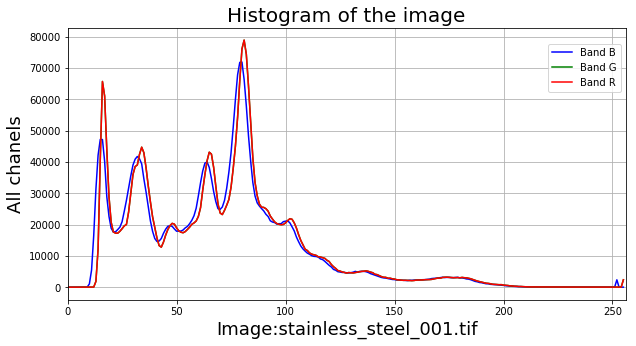

Matplot Histogram for File: stainless_steel_002.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/stainless_steel_002.tif


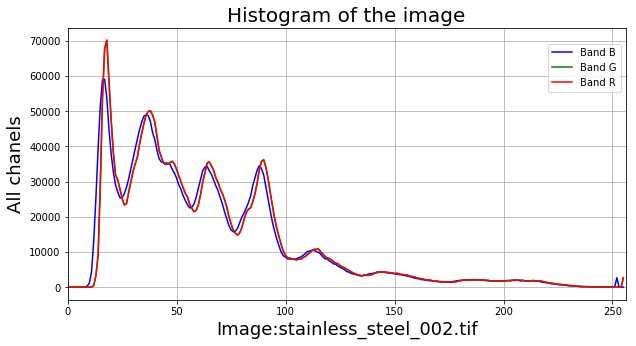

Matplot Histogram for File: stainless_steel_003.tif
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata01/stainless_steel_003.tif


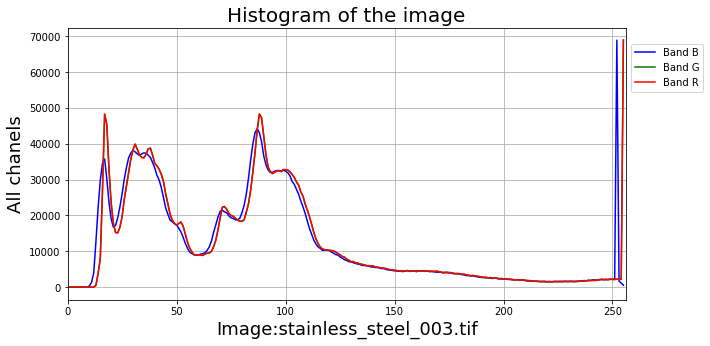

In [59]:
# HISTOGRAMS
# Print Histograms for all folder images
# list_of_images has all the name files

for x in list_of_images:
    print('Matplot Histogram for File:', x)
    print_matplot_hist(path, x)